In [1]:
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U plotly==5.22.0
!pip install -U nbformat==4.2.0 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

## Load data

In [55]:
raw_client_data = pd.read_csv('./logs/c-data.csv')
raw_server_data = pd.read_csv('./logs/s-data.csv')

In [56]:
raw_client_data = raw_client_data.drop(1,axis=0)
# raw_client_data = raw_client_data.drop(index=16383, axis=1)
raw_client_data.head()

,rounds,cid,sid,np_method,p_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,...,miss,local_epochs,dirichlet_alpha,dataset,exploitation,exploration,decay,threshold,ic,tid
0,1,7,cia,deev,random,dnn,0.243506,3.008011,0.404221,3.370297,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
2,1,2,cia,deev,random,dnn,0.319991,2.635936,0.394132,2.812692,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
3,1,4,cia,deev,random,dnn,0.078800,3.421557,0.090674,5.129586,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
4,1,3,cia,deev,random,dnn,0.323187,3.374223,0.253805,3.545947,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
5,1,0,cia,deev,random,dnn,0.340980,2.961261,0.333850,2.189096,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...


In [57]:
raw_client_data['g_eval_acc'].dtype

dtype('float64')

In [58]:
all_labels = raw_client_data['tid'].unique()
all_labels[:5]

array(['letsfed-101mnist250.500.11cia0.20random0.80deev0.05'],
      dtype=object)

In [59]:
others = []

In [60]:
# labels = ['poc', 'avg', 'deev', 'LETSFED', 'r_robin']
labels = ['poc', 'avg', 'deev', 'LETSFED']
c = sns.color_palette('Set1',len(labels))
colors = dict(zip(labels, c))
colors

{'poc': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 'avg': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 'deev': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 'cia': (0.596078431372549, 0.3058823529411765, 0.6392156862745098)}

In [61]:
others_palette = {
    # "R_ROBIN 10 ic:10": colors['r_robin'],
    # "R_ROBIN 20 ic:10": colors['r_robin'],
    # "R_ROBIN 30 ic:10": colors['r_robin'],
    # "R_ROBIN 10 ic:20": colors['r_robin'],
    # "R_ROBIN 20 ic:20": colors['r_robin'],
    # "R_ROBIN 30 ic:20": colors['r_robin'],
    # "R_ROBIN 10 ic:30": colors['r_robin'],
    # "R_ROBIN 20 ic:30": colors['r_robin'],
    # "R_ROBIN 30 ic:30": colors['r_robin'],
    # "R_ROBIN 10 ic:40": colors['r_robin'],
    # "R_ROBIN 20 ic:40": colors['r_robin'],
    # "R_ROBIN 30 ic:40": colors['r_robin'],
    # "R_ROBIN 10 ic:50": colors['r_robin'],
    # "R_ROBIN 20 ic:50": colors['r_robin'],
    # "R_ROBIN 30 ic:50": colors['r_robin'],
    "POC 10 ic:10": colors['poc'],
    "POC 10 ic:100": colors['poc'],
    "POC 20 ic:10": colors['poc'],
    "POC 20 ic:100": colors['poc'],
    "POC 30 ic:10": colors['poc'],
    "POC 30 ic:100": colors['poc'],
    "AVG 10 ic:10": colors['avg'],
    "AVG 10 ic:100": colors['avg'],
    "AVG 20 ic:10": colors['avg'],
    "AVG 20 ic:100": colors['avg'],
    "AVG 30 ic:10": colors['avg'],
    "AVG 30 ic:100": colors['avg'],
    "DEEV 0.01 ic:10": colors['deev'],
    "DEEV 0.01 ic:100": colors['deev'],
    "DEEV 0.005 ic:10": colors['deev'],
    "DEEV 0.005 ic:100": colors['deev'],
    "DEEV 0.001 ic:10": colors['deev'],
    "DEEV 0.001 ic:100": colors['deev'],
    "POC 10 ic:20": colors['poc'],
    "POC 20 ic:20": colors['poc'],
    "POC 30 ic:20": colors['poc'],
    "AVG 10 ic:20": colors['avg'],
    "AVG 20 ic:20": colors['avg'],
    "AVG 30 ic:20": colors['avg'],
    "DEEV 0.01 ic:20": colors['deev'],
    "DEEV 0.005 ic:20": colors['deev'],
    "DEEV 0.001 ic:20": colors['deev'],
    "POC 10 ic:30": colors['poc'],
    "POC 20 ic:30": colors['poc'],
    "POC 30 ic:30": colors['poc'],
    "AVG 10 ic:30": colors['avg'],
    "AVG 20 ic:30": colors['avg'],
    "AVG 30 ic:30": colors['avg'],
    "DEEV 0.01 ic:30": colors['deev'],
    "DEEV 0.005 ic:30": colors['deev'],
    "DEEV 0.001 ic:30": colors['deev'],
    "POC 10 ic:40": colors['poc'],
    "POC 20 ic:40": colors['poc'],
    "POC 30 ic:40": colors['poc'],
    "AVG 10 ic:40": colors['avg'],
    "AVG 20 ic:40": colors['avg'],
    "AVG 30 ic:40": colors['avg'],
    "DEEV 0.01 ic:40": colors['deev'],
    "DEEV 0.005 ic:40": colors['deev'],
    "DEEV 0.001 ic:40": colors['deev'],
    "POC 10 ic:50": colors['poc'],
    "POC 20 ic:50": colors['poc'],
    "POC 30 ic:50": colors['poc'],
    "AVG 10 ic:50": colors['avg'],
    "AVG 20 ic:50": colors['avg'],
    "AVG 30 ic:50": colors['avg'],
    "DEEV 0.01 ic:50": colors['deev'],
    "DEEV 0.005 ic:50": colors['deev'],
    "DEEV 0.001 ic:50": colors['deev'],
    "LetsFed POC random ic:10 expl:25": colors['LETSFED'],
    "LetsFed POC random ic:20 expl:25": colors['LETSFED'],
    "LetsFed POC random ic:30 expl:25": colors['LETSFED'],
    "LetsFed POC random ic:40 expl:25": colors['LETSFED'],
    "LetsFed POC random ic:50 expl:25": colors['LETSFED'],
    "LetsFed POC DEEV ic:10 expl:25": colors['LETSFED'],
    "LetsFed POC DEEV ic:20 expl:25": colors['LETSFED'],
    "LetsFed POC DEEV ic:30 expl:25": colors['LETSFED'],
    "LetsFed POC DEEV ic:40 expl:25": colors['LETSFED'],
    "LetsFed POC DEEV ic:50 expl:25": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:10 expl:25": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:20 expl:25": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:30 expl:25": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:40 expl:25": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:50 expl:25": colors['LETSFED'],
    "LetsFed POC random ic:10 expl:50": colors['LETSFED'],
    "LetsFed POC random ic:20 expl:50": colors['LETSFED'],
    "LetsFed POC random ic:30 expl:50": colors['LETSFED'],
    "LetsFed POC random ic:40 expl:50": colors['LETSFED'],
    "LetsFed POC random ic:50 expl:50": colors['LETSFED'],
    "LetsFed POC DEEV ic:10 expl:50": colors['LETSFED'],
    "LetsFed POC DEEV ic:20 expl:50": colors['LETSFED'],
    "LetsFed POC DEEV ic:30 expl:50": colors['LETSFED'],
    "LetsFed POC DEEV ic:40 expl:50": colors['LETSFED'],
    "LetsFed POC DEEV ic:50 expl:50": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:10 expl:50": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:20 expl:50": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:30 expl:50": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:40 expl:50": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:50 expl:50": colors['LETSFED'],
    "LetsFed POC random ic:10 expl:75": colors['LETSFED'],
    "LetsFed POC random ic:20 expl:75": colors['LETSFED'],
    "LetsFed POC random ic:30 expl:75": colors['LETSFED'],
    "LetsFed POC random ic:40 expl:75": colors['LETSFED'],
    "LetsFed POC random ic:50 expl:75": colors['LETSFED'],
    "LetsFed POC DEEV ic:10 expl:75": colors['LETSFED'],
    "LetsFed POC DEEV ic:20 expl:75": colors['LETSFED'],
    "LetsFed POC DEEV ic:30 expl:75": colors['LETSFED'],
    "LetsFed POC DEEV ic:40 expl:75": colors['LETSFED'],
    "LetsFed POC DEEV ic:50 expl:75": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:10 expl:75": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:20 expl:75": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:30 expl:75": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:40 expl:75": colors['LETSFED'],
    "LetsFed POC R_ROBIN ic:50 expl:75": colors['LETSFED'],
    "LetsFed RANDOM random ic:10 expl:25": colors['LETSFED'],
    "LetsFed RANDOM random ic:20 expl:25": colors['LETSFED'],
    "LetsFed RANDOM random ic:30 expl:25": colors['LETSFED'],
    "LetsFed RANDOM random ic:40 expl:25": colors['LETSFED'],
    "LetsFed RANDOM random ic:50 expl:25": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:10 expl:25": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:20 expl:25": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:30 expl:25": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:40 expl:25": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:50 expl:25": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:10 expl:25": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:20 expl:25": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:30 expl:25": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:40 expl:25": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:50 expl:25": colors['LETSFED'],
    "LetsFed RANDOM random ic:10 expl:50": colors['LETSFED'],
    "LetsFed RANDOM random ic:20 expl:50": colors['LETSFED'],
    "LetsFed RANDOM random ic:30 expl:50": colors['LETSFED'],
    "LetsFed RANDOM random ic:40 expl:50": colors['LETSFED'],
    "LetsFed RANDOM random ic:50 expl:50": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:10 expl:50": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:20 expl:50": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:30 expl:50": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:40 expl:50": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:50 expl:50": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:10 expl:50": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:20 expl:50": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:30 expl:50": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:40 expl:50": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:50 expl:50": colors['LETSFED'],
    "LetsFed RANDOM random ic:10 expl:75": colors['LETSFED'],
    "LetsFed RANDOM random ic:20 expl:75": colors['LETSFED'],
    "LetsFed RANDOM random ic:30 expl:75": colors['LETSFED'],
    "LetsFed RANDOM random ic:40 expl:75": colors['LETSFED'],
    "LetsFed RANDOM random ic:50 expl:75": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:10 expl:75": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:20 expl:75": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:30 expl:75": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:40 expl:75": colors['LETSFED'],
    "LetsFed RANDOM DEEV ic:50 expl:75": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:10 expl:75": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:20 expl:75": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:30 expl:75": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:40 expl:75": colors['LETSFED'],
    "LetsFed RANDOM R_ROBIN ic:50 expl:75": colors['LETSFED'],
    "LetsFed DEEV random ic:10 expl:25": colors['LETSFED'],
    "LetsFed DEEV random ic:20 expl:25": colors['LETSFED'],
    "LetsFed DEEV random ic:30 expl:25": colors['LETSFED'],
    "LetsFed DEEV random ic:40 expl:25": colors['LETSFED'],
    "LetsFed DEEV random ic:50 expl:25": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:10 expl:25": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:20 expl:25": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:30 expl:25": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:40 expl:25": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:50 expl:25": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:10 expl:25": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:20 expl:25": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:30 expl:25": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:40 expl:25": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:50 expl:25": colors['LETSFED'],
    "LetsFed DEEV random ic:10 expl:50": colors['LETSFED'],
    "LetsFed DEEV random ic:20 expl:50": colors['LETSFED'],
    "LetsFed DEEV random ic:30 expl:50": colors['LETSFED'],
    "LetsFed DEEV random ic:40 expl:50": colors['LETSFED'],
    "LetsFed DEEV random ic:50 expl:50": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:10 expl:50": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:20 expl:50": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:30 expl:50": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:40 expl:50": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:50 expl:50": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:10 expl:50": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:20 expl:50": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:30 expl:50": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:40 expl:50": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:50 expl:50": colors['LETSFED'],
    "LetsFed DEEV random ic:10 expl:75": colors['LETSFED'],
    "LetsFed DEEV random ic:20 expl:75": colors['LETSFED'],
    "LetsFed DEEV random ic:30 expl:75": colors['LETSFED'],
    "LetsFed DEEV random ic:40 expl:75": colors['LETSFED'],
    "LetsFed DEEV random ic:50 expl:75": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:10 expl:75": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:20 expl:75": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:30 expl:75": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:40 expl:75": colors['LETSFED'],
    "LetsFed DEEV DEEV ic:50 expl:75": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:10 expl:75": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:20 expl:75": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:30 expl:75": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:40 expl:75": colors['LETSFED'],
    "LetsFed DEEV R_ROBIN ic:50 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:10 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:20 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:30 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:40 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:50 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:10 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:20 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:30 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:40 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:50 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:10 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:20 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:30 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:40 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:50 expl:25": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:10 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:20 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:30 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:40 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:50 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:10 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:20 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:30 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:40 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:50 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:20 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:30 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:40 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:10 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:20 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:30 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:40 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT random ic:50 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:10 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:20 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:30 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:40 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT DEEV ic:50 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:10 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:20 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:30 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:40 expl:75": colors['LETSFED'],
    "LetsFed DEEV-INVERT R_ROBIN ic:50 expl:75": colors['LETSFED'],
}

In [62]:
markers_base = {
    "POC k=10%": 'o', "POC k=20%": "s", "POC k=30%": "p",
    "FedAVG k=10%": "o", "FedAVG k=20%": "s", "FedAVG k=30%": "o",
    "DEEV d=0.01": "o", "DEEV d=0.005": "s", "DEEV d=0.001": "s",
    # "R Robin k=10%": 'o',  "R Robin k=20%": 's', "R Robin k=30%": 'P', 
    "CIA e:POC ne:random": ">",
    "CIA e:POC ne:DEEV": "<",
    "CIA e:POC ne:R_ROBIN": "v",
    "CIA e:RANDOM ne:RANDOM": "D",
    "CIA e:RANDOM ne:DEEV": '8',
    "CIA e:RANDOM ne:R_ROBIN": "H",
    "CIA e:DEEV ne:RANDOM": "X",
    "CIA e:DEEV ne:DEEV": "d",
    "CIA e:DEEV ne:R_ROBIN": "P",
    "CIA e:RANDOM ne:DEEV-INVERT": '^',
    "CIA e:DEEV ne:DEEV-INVERT": ".",
    "CIA e:R_ROBIN ne:DEEV-INVERT":"D",
}
others_markers = {
    # "R_ROBIN 10 ic:10": markers_base["R Robin k=10%"],
    # "R_ROBIN 20 ic:10": markers_base["R Robin k=20%"],
    # "R_ROBIN 30 ic:10": markers_base["R Robin k=30%"],
    # "R_ROBIN 10 ic:20": markers_base["R Robin k=10%"],
    # "R_ROBIN 20 ic:20": markers_base["R Robin k=20%"],
    # "R_ROBIN 30 ic:20": markers_base["R Robin k=30%"],
    # "R_ROBIN 10 ic:30": markers_base["R Robin k=10%"],
    # "R_ROBIN 20 ic:30": markers_base["R Robin k=20%"],
    # "R_ROBIN 30 ic:30": markers_base["R Robin k=30%"],
    # "R_ROBIN 10 ic:40": markers_base["R Robin k=10%"],
    # "R_ROBIN 20 ic:40": markers_base["R Robin k=20%"],
    # "R_ROBIN 30 ic:40": markers_base["R Robin k=30%"],
    # "R_ROBIN 10 ic:50": markers_base["R Robin k=10%"],
    # "R_ROBIN 20 ic:50": markers_base["R Robin k=20%"],
    # "R_ROBIN 30 ic:50": markers_base["R Robin k=30%"],
    "POC 10 ic:100": markers_base['POC k=10%'], "POC 20 ic:100": markers_base['POC k=20%'], "POC 30 ic:100": markers_base['POC k=30%'],
    "AVG 10 ic:100": markers_base['FedAVG k=10%'], "AVG 20 ic:100": markers_base['FedAVG k=20%'], "AVG 30 ic:100": markers_base['FedAVG k=30%'],
    "DEEV 0.01 ic:100": markers_base['DEEV d=0.01'], "DEEV 0.005 ic:100": markers_base['DEEV d=0.005'], "DEEV 0.001 ic:100": markers_base['DEEV d=0.001'],
    "POC 10 ic:10": markers_base['POC k=10%'], "POC 10 ic:20": markers_base['POC k=10%'], "POC 10 ic:30": markers_base['POC k=10%'],
    "POC 10 ic:40": markers_base['POC k=10%'], "POC 10 ic:50": markers_base['POC k=10%'], "POC 20 ic:10": markers_base['POC k=20%'],
    "POC 20 ic:20": markers_base['POC k=20%'], "POC 20 ic:30": markers_base['POC k=20%'], "POC 20 ic:40": markers_base['POC k=20%'],
    "POC 20 ic:50": markers_base['POC k=20%'], "POC 30 ic:10": markers_base['POC k=30%'], "POC 30 ic:20": markers_base['POC k=30%'],
    "POC 30 ic:30": markers_base['POC k=30%'], "POC 30 ic:40": markers_base['POC k=30%'], "POC 30 ic:50": markers_base['POC k=30%'],
    "AVG 10 ic:10": markers_base['FedAVG k=10%'], "AVG 10 ic:20": markers_base['FedAVG k=10%'], "AVG 10 ic:30": markers_base['FedAVG k=10%'],
    "AVG 10 ic:40": markers_base['FedAVG k=10%'], "AVG 10 ic:50": markers_base['FedAVG k=10%'], "AVG 20 ic:10": markers_base['FedAVG k=20%'],
    "AVG 20 ic:20": markers_base['FedAVG k=20%'], "AVG 20 ic:30": markers_base['FedAVG k=20%'], "AVG 20 ic:40": markers_base['FedAVG k=20%'],
    "AVG 20 ic:50": markers_base['FedAVG k=20%'], "AVG 30 ic:10": markers_base['FedAVG k=30%'], "AVG 30 ic:20": markers_base['FedAVG k=30%'],
    "AVG 30 ic:30": markers_base['FedAVG k=30%'], "AVG 30 ic:40": markers_base['FedAVG k=30%'], "AVG 30 ic:50": markers_base['FedAVG k=30%'],
    "DEEV 0.01 ic:10": markers_base['DEEV d=0.01'], "DEEV 0.01 ic:20": markers_base['DEEV d=0.01'], "DEEV 0.01 ic:30": markers_base['DEEV d=0.01'],
    "DEEV 0.01 ic:40": markers_base['DEEV d=0.01'], "DEEV 0.01 ic:50": markers_base['DEEV d=0.01'], "DEEV 0.005 ic:10": markers_base['DEEV d=0.005'],
    "DEEV 0.005 ic:20": markers_base['DEEV d=0.005'], "DEEV 0.005 ic:30": markers_base['DEEV d=0.005'], "DEEV 0.005 ic:40": markers_base['DEEV d=0.005'],
    "DEEV 0.005 ic:50": markers_base['DEEV d=0.005'], "DEEV 0.001 ic:10": markers_base['DEEV d=0.001'], "DEEV 0.001 ic:20": markers_base['DEEV d=0.001'],
    "DEEV 0.001 ic:30": markers_base['DEEV d=0.001'], "DEEV 0.001 ic:40": markers_base['DEEV d=0.001'], "DEEV 0.001 ic:50": markers_base['DEEV d=0.001'],
    "LetsFed POC random ic:10 expl:25": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:10 expl:50": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:10 expl:75": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:20 expl:25": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:20 expl:50": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:20 expl:75": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:30 expl:25": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:30 expl:50": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:30 expl:75": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:40 expl:25": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:40 expl:50": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:40 expl:75": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:50 expl:25": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:50 expl:50": markers_base['CIA e:POC ne:random'],
    "LetsFed POC random ic:50 expl:75": markers_base['CIA e:POC ne:random'],
    "LetsFed POC DEEV ic:10 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:10 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:10 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:20 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:20 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:20 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:30 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:30 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:30 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:40 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:40 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:40 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:50 expl:25": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:50 expl:50": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC DEEV ic:50 expl:75": markers_base['CIA e:POC ne:DEEV'],
    "LetsFed POC R_ROBIN ic:10 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:10 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:10 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:20 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:20 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:20 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:30 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:30 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:30 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:40 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:40 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:40 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:50 expl:25": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:50 expl:50": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed POC R_ROBIN ic:50 expl:75": markers_base['CIA e:POC ne:R_ROBIN'],
    "LetsFed RANDOM random ic:10 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:10 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:10 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:20 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:20 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:20 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:30 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:30 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:30 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:40 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:40 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:40 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:50 expl:25": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:50 expl:50": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM random ic:50 expl:75": markers_base['CIA e:RANDOM ne:RANDOM'],
    "LetsFed RANDOM DEEV ic:10 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:10 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:10 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:20 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:20 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:20 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:30 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:30 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:30 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:40 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:40 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:40 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:50 expl:25": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:50 expl:50": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM DEEV ic:50 expl:75": markers_base['CIA e:RANDOM ne:DEEV'],
    "LetsFed RANDOM R_ROBIN ic:10 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:10 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:10 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:20 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:20 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:20 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:30 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:30 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:30 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:40 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:40 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:40 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:50 expl:25": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:50 expl:50": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed RANDOM R_ROBIN ic:50 expl:75": markers_base["CIA e:RANDOM ne:R_ROBIN"],
    "LetsFed DEEV random ic:10 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:10 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:10 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:20 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:20 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:20 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:30 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:30 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:30 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:40 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:40 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:40 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:50 expl:25": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:50 expl:50": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV random ic:50 expl:75": markers_base['CIA e:DEEV ne:RANDOM'],
    "LetsFed DEEV DEEV ic:10 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:10 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:10 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:20 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:20 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:20 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:30 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:30 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:30 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:40 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:40 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:40 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:50 expl:25": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:50 expl:50": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV DEEV ic:50 expl:75": markers_base["CIA e:DEEV ne:DEEV"],
    "LetsFed DEEV R_ROBIN ic:10 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:10 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:10 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:20 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:20 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:20 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:30 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:30 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:30 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:40 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:40 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:40 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:50 expl:25": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:50 expl:50": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV R_ROBIN ic:50 expl:75": markers_base['CIA e:DEEV ne:R_ROBIN'],
    "LetsFed DEEV-INVERT random ic:10 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:10 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:10 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:20 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:20 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:20 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:30 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:30 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:30 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:40 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:40 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:40 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:50 expl:25": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:50 expl:50": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT random ic:50 expl:75": markers_base["CIA e:RANDOM ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:10 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:10 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:10 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:20 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:20 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:20 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:30 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:30 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:30 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:40 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:40 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:40 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:50 expl:25": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:50 expl:50": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT DEEV ic:50 expl:75": markers_base["CIA e:DEEV ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:10 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:10 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:20 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:20 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:20 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:30 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:30 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:30 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:40 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:40 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:40 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:50 expl:25": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],
    "LetsFed DEEV-INVERT R_ROBIN ic:50 expl:75": markers_base["CIA e:R_ROBIN ne:DEEV-INVERT"],

}

In [63]:
only= [
]
filter_data = [
]

In [68]:
o_data = raw_client_data.loc[(raw_client_data['tid'].isin(others))]
o_data  = raw_client_data.loc[(raw_client_data['tid'].isin(only))]
# data = raw_client_data.loc[~(raw_client_data['tid'].isin(others))]
data = raw_client_data
# data = data.loc[(data['tid'].isin(filter_data))]

In [69]:
o_data.shape

(0, 31)

In [70]:
data

,rounds,cid,sid,np_method,p_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,...,miss,local_epochs,dirichlet_alpha,dataset,exploitation,exploration,decay,threshold,ic,tid
0,1,7,cia,deev,random,dnn,0.243506,3.008011,0.404221,3.370297,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
2,1,2,cia,deev,random,dnn,0.319991,2.635936,0.394132,2.812692,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
3,1,4,cia,deev,random,dnn,0.078800,3.421557,0.090674,5.129586,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
4,1,3,cia,deev,random,dnn,0.323187,3.374223,0.253805,3.545947,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
5,1,0,cia,deev,random,dnn,0.340980,2.961261,0.333850,2.189096,...,1,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,25,2,cia,deev,random,dnn,0.973000,0.102485,0.968000,0.087829,...,7,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
246,25,6,cia,deev,random,dnn,0.941000,0.166163,0.978000,0.052460,...,9,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
247,25,4,cia,deev,random,dnn,0.948000,0.221516,0.974000,0.069384,...,2,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...
248,25,8,cia,deev,random,dnn,0.923000,0.242022,0.964000,0.110456,...,7,1,0.1,mnist,0.8,0.2,0.05,1.0,0.5,letsfed-101mnist250.500.11cia0.20random0.80dee...


In [79]:
teste = pd.concat([o_data, data])
data_25 = pd.concat([o_data, data.loc[data['exploration'] == 0.2]])
s_data_25 = raw_server_data.loc[
    (raw_server_data['exploration'] == 0.2) |
    (raw_server_data['tid'].isin(only))
]
data_50 = pd.concat([o_data, data.loc[data['exploration'] == 0.50]])
s_data_50 = raw_server_data.loc[
    (raw_server_data['exploration'] == 0.50) |
    (raw_server_data['tid'].isin(only))
]
data_75 = pd.concat([o_data, data.loc[data['exploration'] == 0.75]])
s_data_75 = raw_server_data.loc[
    (raw_server_data['exploration'] == 0.75) |
    (raw_server_data['tid'].isin(only))
]

In [80]:
ics=[0.1,0.2,0.3,0.4,0.5]
expl=[0.25,0.5,0.75]

In [81]:
data_25.loc[data_25['rounds'] == 20].groupby(['tid']).agg({'g_eval_acc': 'mean', 'ic': 'first'})

,g_eval_acc,ic
tid,,
letsfed-101mnist250.500.11cia0.20random0.80deev0.05,0.9315,0.5


In [82]:
data_50.loc[data_50['rounds'] == 20].groupby(['tid']).agg({'g_eval_acc': 'mean', 'ic': 'first'})

,g_eval_acc,ic
tid,,


In [83]:
data_75.loc[data_75['rounds'] == 50].groupby(['tid']).agg({'g_eval_acc': 'mean', 'ic': 'first'})

,g_eval_acc,ic
tid,,


# PLOTS DEFs

In [84]:
def plot_gain_engagement(df, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y='gain',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=4, loc='center', bbox_to_anchor=(0.5, 1.05))
    g.set_axis_labels("", 'n_participating_clients')
    g.fig.suptitle(suptitle, y=1.1)
    g.savefig(filename_to_save)

In [85]:
def plot_swap_engagement(df, y, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y=y,
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=4, loc='center', bbox_to_anchor=(0.5, 1.05))
    g.set_axis_labels("", 'n_participating_clients')
    g.fig.suptitle(suptitle, y=1.1)
    g.savefig(filename_to_save)

# ALL

## Lineplot

In [86]:
sns.set_style('whitegrid', {'grid.linestyle': '--'})

In [87]:
legend_elements = []
for key, value in markers_base.items():
    color = None
    label = key
    if "POC k=30" in key:
        label = 'POC'
        color = colors['poc']
    elif 'AVG k=30' in key:
        label = 'AVG'
        color = colors['avg']
    elif 'DEEV d=0.001' in key:
        label = 'DEEV'
        color = colors['deev']
    elif "CIA e:R_ROBIN ne:DEEV-INVERT" in key:
        label = 'LestFed'
        color = colors['LETSFED']
    if type(color) != type(None):
        legend_elements.append(Line2D([0], [0], label=label, color=color, marker=value)),

In [88]:
def my_lineplot(df, legend_elements, suptitle, filename_to_save, config=0):
    g = sns.relplot(
        x='rounds',
        y='g_eval_acc',
        data=df,
        col='ic',
        hue='tid',
        style='tid',
        markers=others_markers,
        markevery=5,
        dashes=[[1,0]],
        markersize=8,
        palette=others_palette,
        errorbar=('ci', False),
        facet_kws={'sharey': True, 'legend_out': False},
        kind='line',
    )
    g._legend.remove()

    g.set_axis_labels("Communication Rounds", 'Accuracy (%)', fontsize=14)
    for i, ax in enumerate(g.axes[0]):
        ax.set_ylim(0,1)
        if config == 0:
            a = r'Start with $|C_{\iota}|$'
            ax.set_title(f"{a}={ics[i]*100:.0f}")
            ax.set_xlabel("")
            ax.set_xticklabels([])
        elif config == 1:
            ax.set_title("")
            ax.set_xlabel("")
            ax.set_xticklabels([])
        else:
            ax.set_title("")
            if i != 2:  # Remove xlabel for all subplots except the middle one
                ax.set_xlabel("")
    if config == 0:
        g.fig.legend(handles=legend_elements, ncol=4, loc='center', bbox_to_anchor=(0.5, 1.08))
    g.fig.set_size_inches(13,3)
    plt.subplots_adjust(hspace=0, wspace=0)
    # plt.xticks([])
    # g.fig.suptitle(suptitle, y=1)
    g.savefig(filename_to_save, dpi=200, format='eps')

def my_lineplot_v1_acc(df, palette, ax, makers):
    df = df.loc[df['rounds'] == 50].groupby(['rounds', 'tid', 'ic', 'exploration']).agg({'g_eval_acc': 'mean', 'l_eval_acc': 'mean'}).reset_index()
    sns.lineplot(
        ax = ax,
        data=df,
        x='exploration',
        y='g_eval_acc',
        palette=palette,
        hue='ic',
        style='ic',
        markers=markers,
        dashes=[[1,0]],
    )

def my_lineplot_v4(df, legend_elements, suptitle, filename_to_save, config=0):
    fig, axes = plt.subplots(2, 2, figsize=(7, 6))  # Cria uma figura e uma grade 2x2 de subplots
    axes = axes.flatten()  # Transforma a grade em um array unidimensional para facilitar a iteração
    
    # Define as configurações para cada subplot
    for i, ax in enumerate(axes):
        # Filtra os dados baseados em 'ic'
        init_client = df['ic'].unique()[i % len(df['ic'].unique())]
        filtered_df = df[df['ic'] == init_client]
        
        # Plota os dados no subplot
        sns.lineplot(
            x='rounds',
            y='g_eval_acc',
            data=filtered_df,
            hue='tid',
            style='tid',
            markers=others_markers,
            markevery=5,
            dashes=[[1,0]],
            markersize=7,
            palette=others_palette,
            ax=ax,
            legend=False,
            errorbar=('ci', False),
        )
        
        # Configurações do eixo
        ax.set_xlabel('Communication Rounds' if i // 2 == 1 else '', fontsize=16)  # Apenas nos subplots inferiores
        ax.set_ylabel('Accuracy (%)' if i % 2 == 0 else '', fontsize=16)  # Apenas nos subplots da esquerda
        ax.set_ylim(0.20, 1)
        
        # Títulos condicionais baseados em 'config'
        if config == 0:
            title = f"Start with $|C_{{\iota}}|={ics[i+1]*100:.0f}$"
            ax.set_title(title)
        else:
            ax.set_title("")
        
        # Remove rótulos internos
        ax.label_outer()
        ax.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')
    
    # Adiciona a legenda geral
    if config == 0:
        fig.legend(handles=legend_elements, ncol=4, loc='center', bbox_to_anchor=(0.5, 0.95), frameon=False, fontsize=14)
    plt.subplots_adjust(hspace=0.19, wspace=0.05)
    
    # Ajustes finais
    # fig.suptitle('muted')
    plt.savefig(filename_to_save, dpi=200, format='eps')

/tmp/ipykernel_86639/360668419.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipykernel_86639/79445557.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


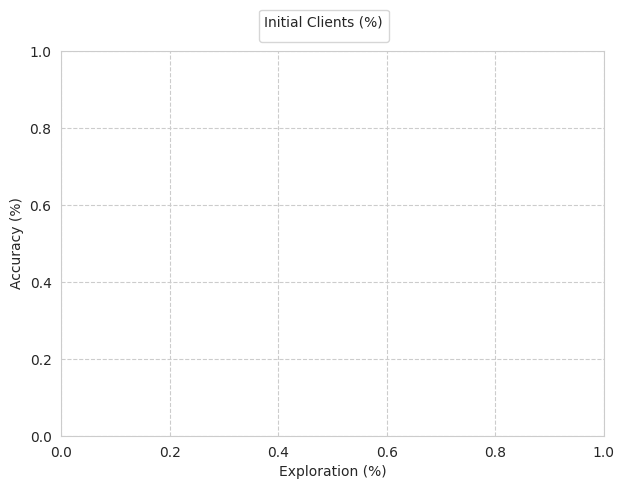

In [89]:
fig, ax = plt.subplots(figsize=(7,5))
labels = [
    "SolFL IC: 10",
    "SolFL IC: 20",
    "SolFL IC: 30",
    "SolFL IC: 40",
    "SolFL IC: 50",
]
markers = [
    's',
    'o',
    'X',
    'v',
    '8',
]
colors = plt.cm.inferno(np.linspace(0.02, 0.8, len(labels)))
legends = [
    Line2D([0], [0], label=labels[i], color=colors[i])
    for i in range(len(labels))
]
palette = dict(zip([0.1,0.2,0.3,0.4,0.5], colors))
markers_a = dict(zip([0.1,0.2,0.3,0.4,0.5], markers))
my_lineplot_v1_acc(data, palette=palette, ax=ax, makers=markers_a)
ax.grid(True)
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Exploration (%)")
h, l = ax.get_legend_handles_labels()
fig.legend(title="Initial Clients (%)", handles=h, loc='center', bbox_to_anchor=(0.5,0.93), ncol=5)
ax.legend().remove()

In [90]:
df = pd.concat([data, o_data])
df = df.loc[df['rounds'] == 50].groupby(['rounds', 'tid', 'ic', 'exploration']).agg({'g_eval_acc': 'mean', 'l_eval_acc': 'mean'}).reset_index()
df

,rounds,tid,ic,exploration,g_eval_acc,l_eval_acc


ValueError: The palette dictionary is missing keys: {'letsfed-101mnist250.500.11cia0.20random0.80deev0.05'}

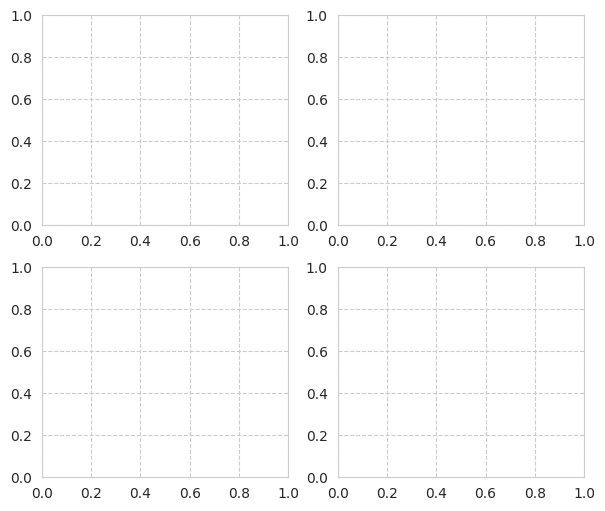

In [91]:
remove = [0.10]
my_lineplot_v4(data_25.loc[~(data_25['ic'].isin(remove))], legend_elements, "Exploration 25%", 'new_accuracy_0.25.eps')

In [ ]:
import numpy as np
def calculate_performance(df, perc):
    d = df.loc[
        # (df['is_selected'] == True) &
        (df['rounds'] == 50) &
        (df['ic'] == perc)
    ]

    sol = ['LETSFED', 'POC', 'AVG', '0.001']

    r = []

    for s in sol:
        r.append(d.loc[d['tid'].str.contains(s)]['g_eval_abarplot_palettecc'].mean())
    print(np.array(r))
    for i, s in enumerate(sol):
        if i > 0:
            print(f"{s}: {(r[0] - r[i])/r[0]:.2f}")

In [ ]:
calculate_performance(data_25, 0.1)

[0.6617 0.4685 0.5721 0.3967]
POC: 0.29
AVG: 0.14
0.001: 0.40


/tmp/ipykernel_5551/738734947.py:2: UserWarning: 
The dashes list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


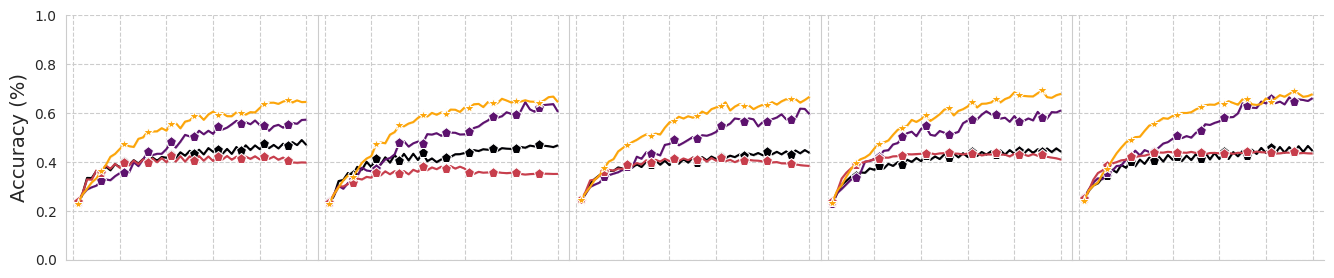

In [ ]:

my_lineplot(data_50, legend_elements, "Exploration 50%", 'accuracy_0.50.eps', config=1)

/tmp/ipykernel_1404524/1612683215.py:2: UserWarning: 
The dashes list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


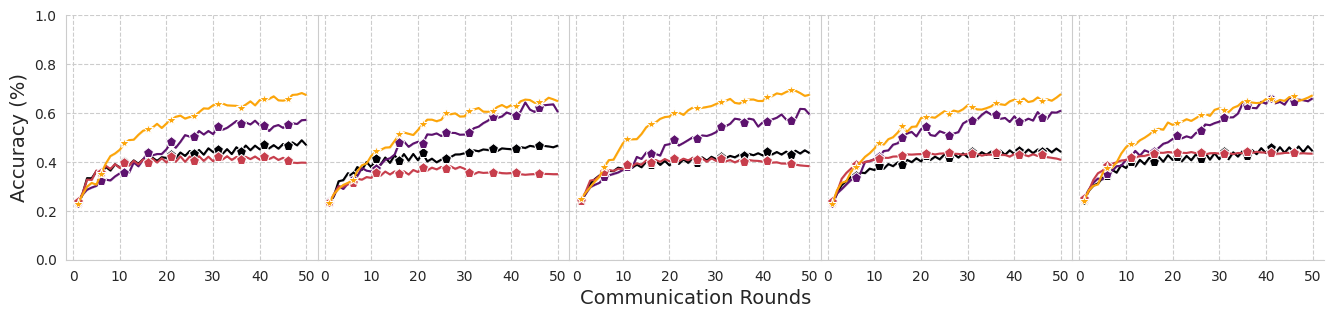

In [ ]:
my_lineplot(data_75, legend_elements, "Exploration 75%", 'accuracy_0.75.eps', config=2)

## Network waste

In [38]:
barplot_labels = [
    "POC k=30%",
    # "POC k=10%","POC k=20%","POC k=30%",
    "FedAVG k=30%",
    # "FedAVG k=10%","FedAVG k=20%","FedAVG k=30%",
    # "R Robin k=10%", "R Robin k=20%", "R Robin k=30%", 
    "DEEV d=0.001",
    # "DEEV d=0.01","DEEV d=0.005","DEEV d=0.001",
    # "LetsFed POC random","LetsFed POC DEEV","LetsFed POC R_ROBIN",
    # "LetsFed RANDOM random","LetsFed RANDOM DEEV","LetsFed RANDOM R_ROBIN",
    # "LetsFed DEEV random","LetsFed DEEV DEEV","LetsFed DEEV R_ROBIN",
    # "LetsFed DEEV-INVERT random","LetsFed DEEV-INVERT DEEV","LetsFed DEEV-INVERT R_ROBIN",
    "CIA e:R_ROBIN ne:DEEV-INVERT",
]
c = sns.color_palette('Set1',len(labels))
barplot_colors = dict(zip(barplot_labels, c))
barplot_colors

{'POC k=30%': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 'FedAVG k=30%': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV d=0.001': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 'CIA e:R_ROBIN ne:DEEV-INVERT': (0.596078431372549,
  0.3058823529411765,
  0.6392156862745098)}

In [39]:
# bar_labels = []
# for label in all_labels:
#     if "LetsFed DEEV-INVERT R_ROBIN" in label or "POC 30" in label or "AVG 30" in label or "DEEV 0.001" in label:
#         if 'ic:10' in label:
#             bar_labels.append((label, 0.1))
#             bar_labels.append((label, 0.1))
#         elif 'ic:20' in label:
#             bar_labels.append((label, 0.2))
#         elif 'ic:30' in label:
#             bar_labels.append((label, 0.3))
#         elif 'ic:40' in label:
#             bar_labels.append((label, 0.4))
#         elif 'ic:50' in label:
#             bar_labels.append((label, 0.5))
#     # elif 'ic:100' in label:
#         # bar_labels.append((label, 1.0))
# i=130
# bar_labels
bar_labels = []
for label in all_labels:
    if "LetsFed DEEV-INVERT R_ROBIN" in label or "POC 30" in label or "AVG 30" in label or "DEEV 0.001" in label:
        if 'ic:10' in label:
            bar_labels.append(label)
            bar_labels.append(label)
        elif 'ic:20' in label:
            bar_labels.append(label)
        elif 'ic:30' in label:
            bar_labels.append(label)
        elif 'ic:40' in label:
            bar_labels.append(label)
        elif 'ic:50' in label:
            bar_labels.append(label)
    # elif 'ic:100' in label:
        # bar_labels.append((label, 1.0))
i=130
bar_labels

['POC 30 ic:10',
 'POC 30 ic:10',
 'AVG 30 ic:10',
 'AVG 30 ic:10',
 'DEEV 0.001 ic:10',
 'DEEV 0.001 ic:10',
 'POC 30 ic:20',
 'AVG 30 ic:20',
 'DEEV 0.001 ic:20',
 'POC 30 ic:30',
 'AVG 30 ic:30',
 'DEEV 0.001 ic:30',
 'POC 30 ic:40',
 'AVG 30 ic:40',
 'DEEV 0.001 ic:40',
 'POC 30 ic:50',
 'AVG 30 ic:50',
 'DEEV 0.001 ic:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:25',
 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:25',
 'LetsFed DEEV-INVERT R_ROBIN ic:20 expl:25',
 'LetsFed DEEV-INVERT R_ROBIN ic:30 expl:25',
 'LetsFed DEEV-INVERT R_ROBIN ic:40 expl:25',
 'LetsFed DEEV-INVERT R_ROBIN ic:50 expl:25',
 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:20 expl:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:30 expl:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:40 expl:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50',
 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:75',
 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:75',
 'LetsFed DEEV-INVERT R_RO

In [40]:
bar_colors = []
for i, label in enumerate(bar_labels):
    # if "POC 10" in label[0]:
    #     bar_colors.append(barplot_colors["POC k=10%"])
    # if "POC 20" in label[0]:
    #     bar_colors.append(barplot_colors["POC k=20%"])
    if "POC 30" in label:
        bar_colors.append(barplot_colors["POC k=30%"])
    # if "AVG 10" in label[0]:
    #     bar_colors.append(barplot_colors["FedAVG k=10%"])
    # if "AVG 20" in label[0]:
    #     bar_colors.append(barplot_colors["FedAVG k=20%"])
    if "AVG 30" in label:
        bar_colors.append(barplot_colors["FedAVG k=30%"])
    # if "DEEV 0.01" in label[0]:
    #     bar_colors.append(barplot_colors["DEEV d=0.01"])
    # if "DEEV 0.005" in label[0]:
    #     bar_colors.append(barplot_colors["DEEV d=0.005"])
    if "DEEV 0.001" in label:
        bar_colors.append(barplot_colors["DEEV d=0.001"])
    # if "R_ROBIN 10" in label[0]:
    #     bar_colors.append(barplot_colors["R Robin k=10%"])
    # if "R_ROBIN 20" in label[0]:
    #     bar_colors.append(barplot_colors["R Robin k=20%"])
    # if "R_ROBIN 30" in label[0]:
    #     bar_colors.append(barplot_colors["R Robin k=30%"])
    # if "LetsFed POC random" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed POC random"])
    # if "LetsFed POC DEEV" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed POC DEEV"])
    # if "LetsFed POC R_ROBIN" in label[0]:
        # bar_colors.append(barplot_colors["LetsFed POC R_ROBIN"])
    # if "LetsFed RANDOM random" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed RANDOM random"])
    # if "LetsFed RANDOM DEEV" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed RANDOM DEEV"])
    # if "LetsFed RANDOM R_ROBIN ic:20 expl:50" in label[0]:
    #     print(f"{i}")
    #     print(f"{label[0]}") 
    # if "LetsFed RANDOM R_ROBIN" in label[0]:
        # bar_colors.append(barplot_colors["LetsFed RANDOM R_ROBIN"])
    # if "LetsFed DEEV random" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed DEEV random"])
    # if "LetsFed DEEV DEEV" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed DEEV DEEV"])
    # if "LetsFed DEEV R_ROBIN" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed DEEV R_ROBIN"])
    # if "LetsFed DEEV-INVERT random" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed DEEV-INVERT random"])
    # if "LetsFed DEEV-INVERT DEEV" in label[0]:
    #     bar_colors.append(barplot_colors["LetsFed DEEV-INVERT DEEV"])
    # if "LetsFed DEEV-INVERT R_ROBIN" == label[0]:
    #     print("LetsFed DEEV-INVERT R_ROBIN" in label[0])
    if "DEEV-INVERT R_ROBIN" in label:
        bar_colors.append(barplot_colors["CIA e:R_ROBIN ne:DEEV-INVERT"])
i=130
# print(len(bar_labels), len(bar_colors))
bar_colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.101960

In [41]:
barplot_palette = dict(zip(bar_labels, bar_colors))
barplot_palette

{'POC 30 ic:10': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:10': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:10': (0.30196078431372547,
  0.6862745098039216,
  0.2901960784313726),
 'POC 30 ic:20': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:20': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:20': (0.30196078431372547,
  0.6862745098039216,
  0.2901960784313726),
 'POC 30 ic:30': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:30': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:30': (0.30196078431372547,
  0.6862745098039216,
  0.2901960784313726),
 'POC 30 ic:40': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:40': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:40': (0.30196078431372547,
  0.686274509

In [42]:
bar_legends = []
for key, value in barplot_colors.items():
    # if "LetsFed" in key:
    label = key
    if "POC k=30" in key:
        label = 'POC'
    elif 'AVG k=30' in key:
        label = 'AVG'
    elif 'DEEV d=0.001' in key:
        label = 'DEEV'
    elif 'LETSFED' in key:
        label = 'LetsFed'
    bar_legends.append(Patch(label=label, color=value))
bar_legends
bar_legends

In [43]:
def my_barplot(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    order = df.groupby('tid')['size'].sum().sort_values().index
    
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == False)
        ],
        y='size',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='bar',
        estimator=sum,
        # order = df.sort_values('size')['size'],
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


In [44]:
def my_barplot_total(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1)
        ],
        y='size',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='bar',
        # order=df['size'],
        estimator=sum,
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


ValueError: The palette dictionary is missing keys: {('AVG 30 ic:40', 0.4), ('DEEV 0.001 ic:20', 0.2), ('LetsFed DEEV-INVERT R_ROBIN ic:50 expl:25', 0.5), ('AVG 30 ic:20', 0.2), ('POC 30 ic:40', 0.4), ('DEEV 0.001 ic:10', 0.1), ('LetsFed DEEV-INVERT R_ROBIN ic:30 expl:25', 0.3), ('POC 30 ic:20', 0.2), ('AVG 30 ic:30', 0.3), ('DEEV 0.001 ic:50', 0.5), ('AVG 30 ic:10', 0.1), ('DEEV 0.001 ic:40', 0.4), ('POC 30 ic:30', 0.3), ('LetsFed DEEV-INVERT R_ROBIN ic:10 expl:25', 0.1), ('POC 30 ic:10', 0.1), ('LetsFed DEEV-INVERT R_ROBIN ic:40 expl:25', 0.4), ('LetsFed DEEV-INVERT R_ROBIN ic:20 expl:25', 0.2), ('DEEV 0.001 ic:30', 0.3), ('POC 30 ic:50', 0.5), ('AVG 30 ic:50', 0.5)}

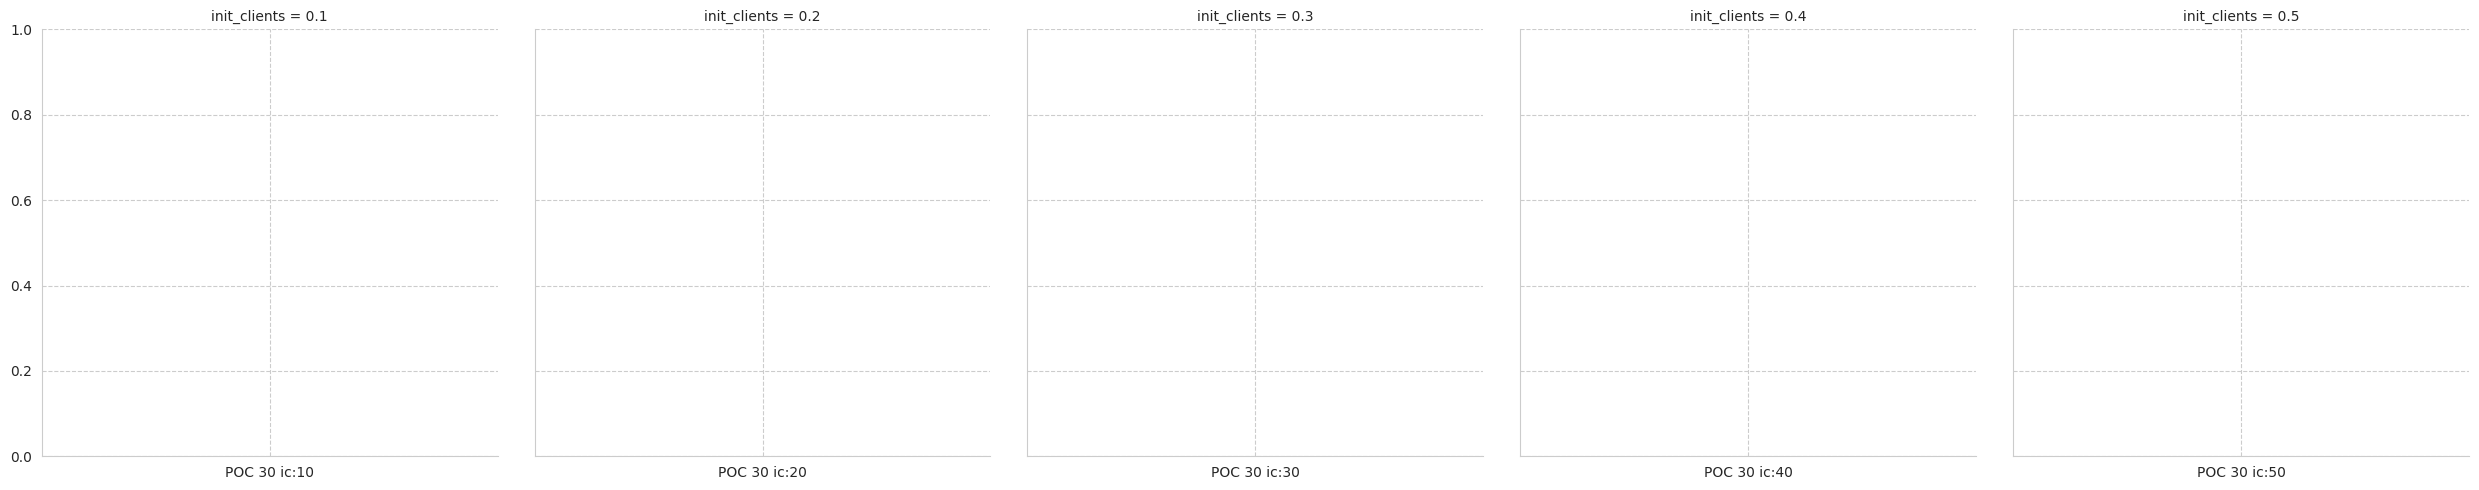

In [550]:
my_barplot(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


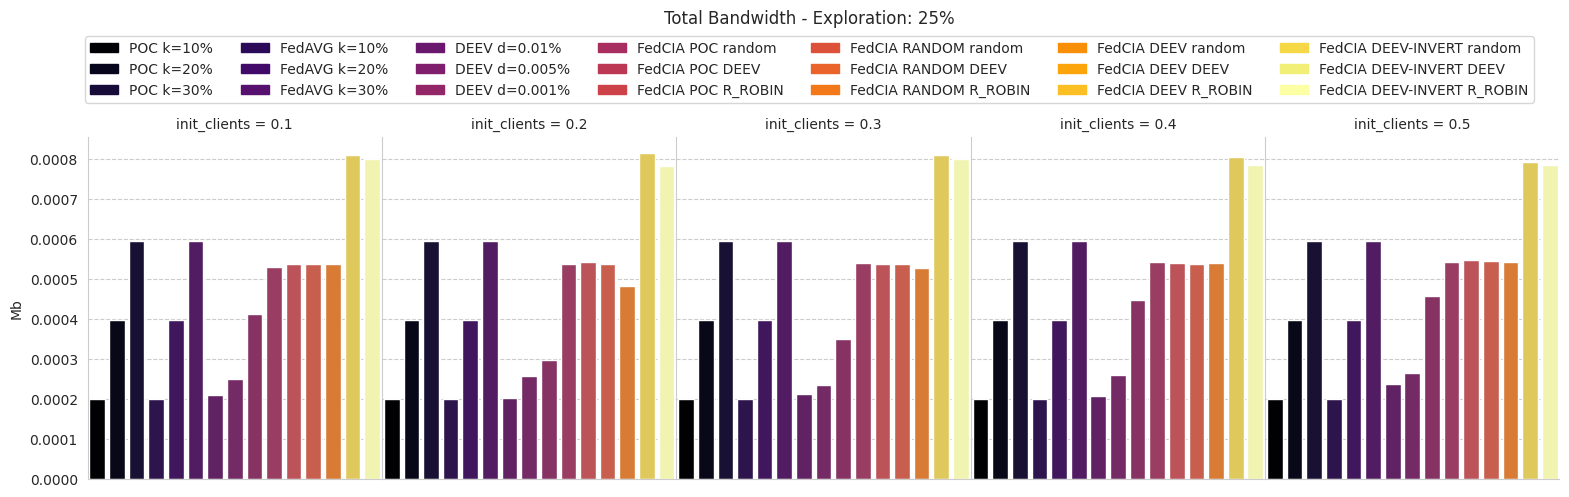

In [ ]:
my_barplot_total(
    data_25,
    bar_legends,
    "Total Bandwidth - Exploration: 25%",
    'waste_0.25.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


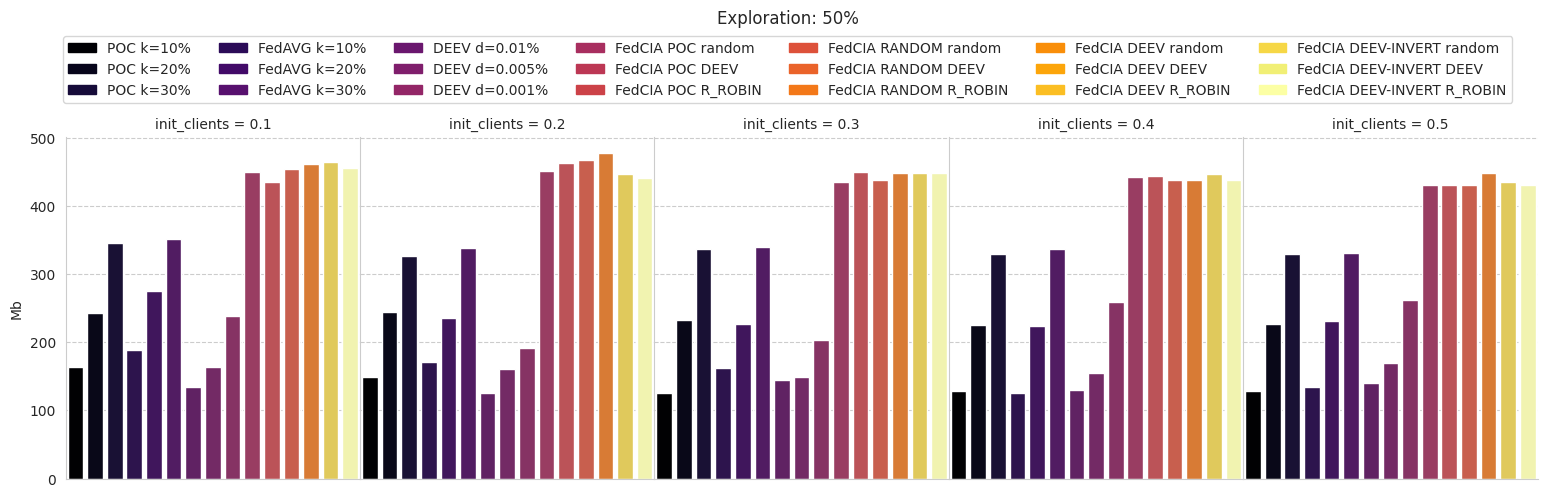

In [ ]:
my_barplot(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'waste_0.50.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


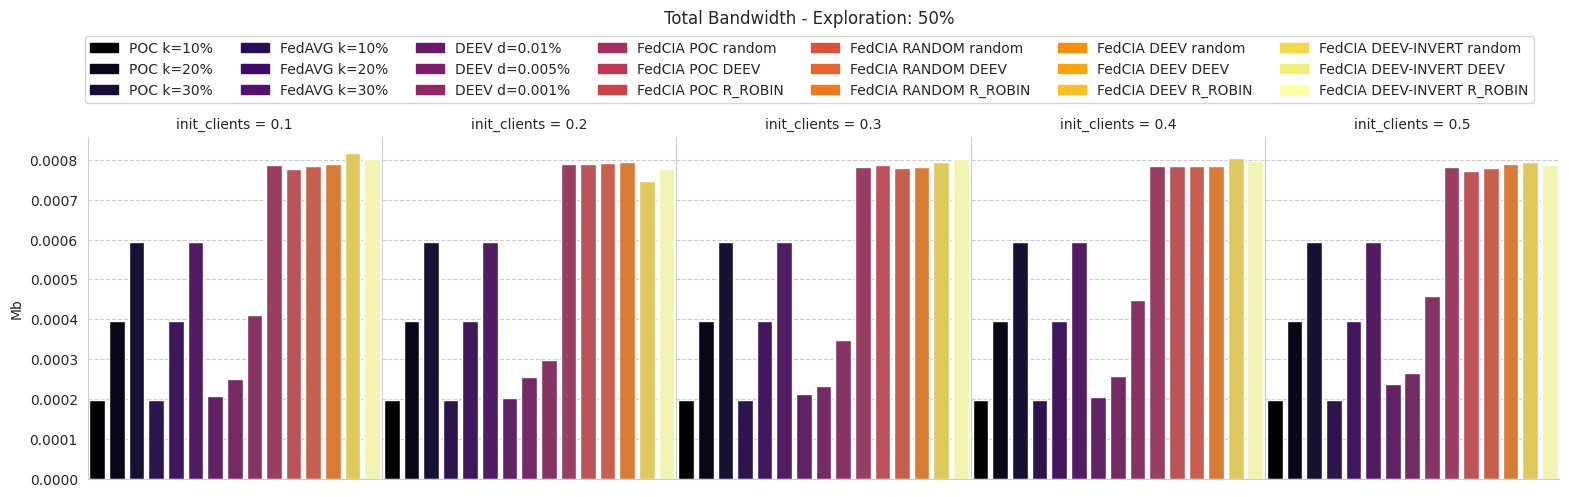

In [ ]:
my_barplot_total(
    data_50,
    bar_legends,
    "Total Bandwidth - Exploration: 50%",
    'waste_0.50.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


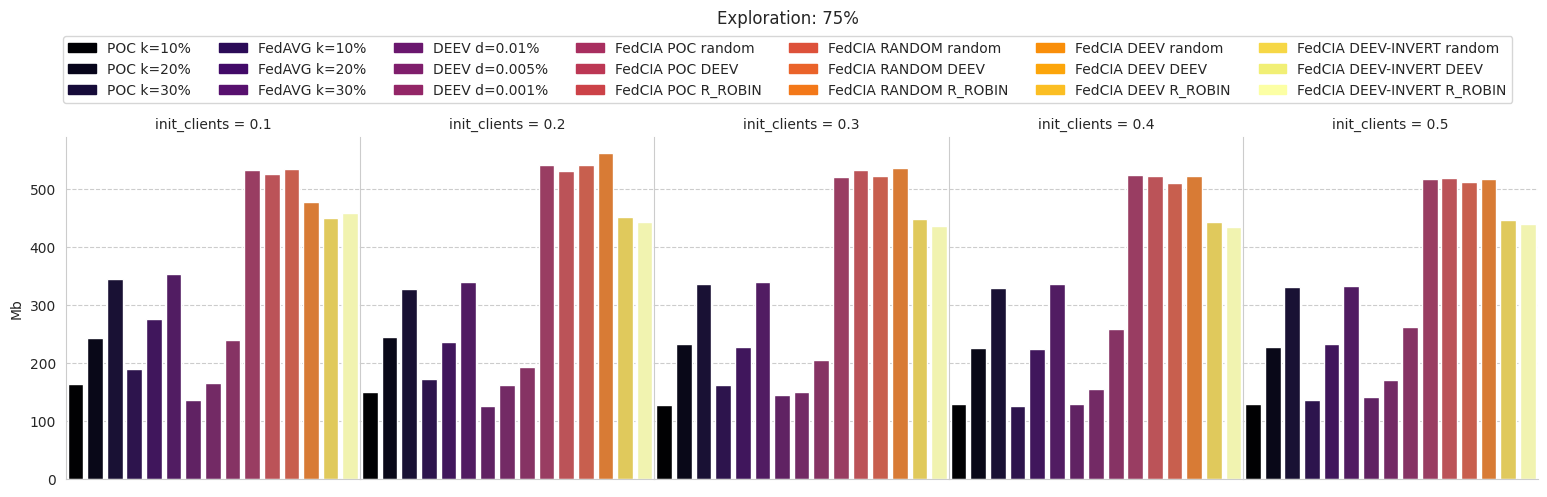

In [ ]:
my_barplot(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'waste_0.75.png',
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


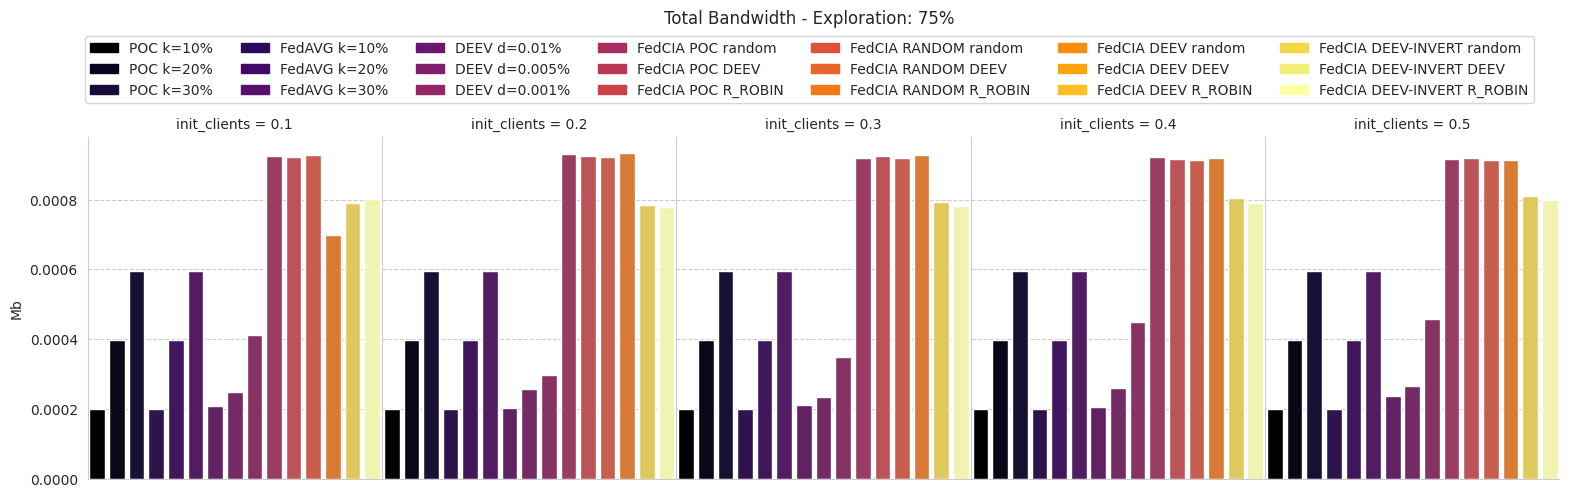

In [ ]:
my_barplot_total(
    data_75,
    bar_legends,
    "Total Bandwidth - Exploration: 75%",
    'waste_0.75.png',
)

## BOXPLOT

In [45]:
o_data_s = raw_server_data.loc[(raw_server_data['tid'].isin(others))]
o_data_s = o_data_s.loc[o_data_s['tid'].isin(only)]

In [46]:
boxplot_25 = pd.concat([
    raw_server_data.loc[
        (raw_server_data['exploration'] == 0.25) &
        (raw_server_data['tid'].isin(filter_data))
    ], o_data_s])
boxplot_50 = pd.concat([
    raw_server_data.loc[
        (raw_server_data['exploration'] == 0.50) &
        (raw_server_data['tid'].isin(filter_data))
    ], o_data_s])
boxplot_75 = pd.concat([
    raw_server_data.loc[
        (raw_server_data['exploration'] == 0.75) &
        (raw_server_data['tid'].isin(filter_data))
    ], o_data_s])

In [59]:
def my_boxplot(df, legends, suptitle, filename_to_save, config=0):
    g = sns.catplot(
        data=df,
        y='n_participating_clients',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()

    g.fig.set_size_inches(15,3)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    ylabel = r"$|C_{\iota}|$"
    g.set_axis_labels("", ylabel, fontsize=14)
    for i, ax in enumerate(g.axes.flatten()):
        ax.set_ylim(10,70)
        if config == 0:
            a = r'Start with $|C_{\iota}|$'
            ax.set_title(f"{a}={ics[i]*100:.0f}")
            ax.set_xlabel("")
            ax.set_xticklabels([])
        else:
            ax.set_title("")
            ax.set_xlabel("")
            ax.set_xticklabels([])
            
    if config == 0:
        g.fig.legend(handles=legends, ncol=4, loc='center', bbox_to_anchor=(0.5, 1.08))
    # g.fig.suptitle(suptitle, y=1.2)
    g.savefig(filename_to_save, dpi=200, format='eps')

def my_boxplot_v2(df, legends, suptitle, filename_to_save, config=0):
    # Cria a figura e os subplots
    fig, axes = plt.subplots(2, 2, figsize=(7, 6))
    axes = axes.flatten()  # Transforma a grade 2x2 em uma lista plana de eixos

    # Itera sobre os subplots para desenhar os gráficos de caixa
    for i, ax in enumerate(axes):
        # Filtra os dados baseados em 'ic' para cada subplot
        init_client = df['ic'].unique()[i % len(df['ic'].unique())]
        filtered_df = df[df['ic'] == init_client]

        # Desenha o gráfico de caixa no subplot correspondente
        sns.boxplot(
            x='tid',
            y='n_participating_clients',
            hue='tid',  # Ajuste para os dados desejados, se necessário
            data=filtered_df,
            palette=barplot_palette,
            showfliers=False,
            ax=ax,
            linecolor='black'
        )

        ylabel = r"$|C_{\iota}|$"
        a = r'Start with $|C_{\iota}|$'
        ax.set_title(f"{a}={ics[i+1]*100:.0f}" if config == 0 else "")
        ax.set_xlabel('')  # Remove o texto do eixo X
        ax.set_ylabel(ylabel if i % 2 == 0 else "", fontsize=16)
        ax.set_ylim(10, 70)  # Ajusta o limite do eixo Y
        ax.set_xticklabels([])  # Remove os rótulos do eixo X
        ax.legend().remove()  # Remove a legenda para cada subplot

        ax.label_outer()  # Gerencia os rótulos de eixo para reduzir duplicação
        ax.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')
        ax.set_axisbelow(True)      # Ajustes finais na figura
    if config == 0:
        fig.legend(handles=legends, ncol=4, loc='center', bbox_to_anchor=(0.5, 0.95), frameon=False, fontsize=14)
    plt.subplots_adjust(hspace=0.19, wspace=0.05)
    # fig.suptitle(suptitle)

    # Salva o gráfico
    plt.savefig(filename_to_save, dpi=200, format='eps')



In [60]:
bar_legends
new_legends = [
    bar_legends[-1],
    bar_legends[0],
    bar_legends[1],
    bar_legends[2],
]

/tmp/ipykernel_5166/3797536187.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()  # Remove a legenda para cada subplot
/tmp/ipykernel_5166/3797536187.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()  # Remove a legenda para cada subplot
/tmp/ipykernel_5166/3797536187.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()  # Remove a legenda para cada subplot
/tmp/ipykernel_5166/3797536187.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called wit

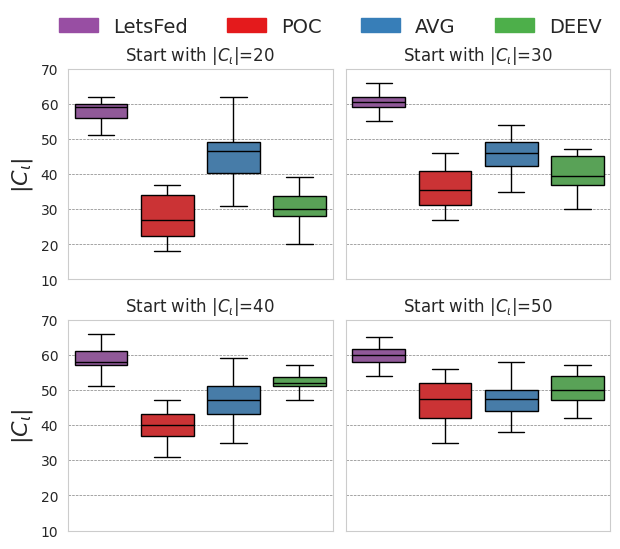

In [62]:
my_boxplot_v2(
    boxplot_25.loc[~(boxplot_25['ic'] == 0.1)],
    new_legends,
    "Exploration: 25%",
    "new_participating_clients_0.25.eps")

ValueError: The palette dictionary is missing keys: {('LetsFed DEEV-INVERT R_ROBIN ic:20 expl:50', 0.2), ('POC 30 ic:40', 0.4), ('DEEV 0.001 ic:20', 0.2), ('DEEV 0.001 ic:40', 0.4), ('POC 30 ic:50', 0.5), ('DEEV 0.001 ic:10', 0.1), ('POC 30 ic:10', 0.1), ('POC 30 ic:20', 0.2), ('POC 30 ic:30', 0.3), ('AVG 30 ic:10', 0.1), ('AVG 30 ic:30', 0.3), ('LetsFed DEEV-INVERT R_ROBIN ic:30 expl:50', 0.3), ('DEEV 0.001 ic:30', 0.3), ('DEEV 0.001 ic:50', 0.5), ('LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50', 0.1), ('LetsFed DEEV-INVERT R_ROBIN ic:40 expl:50', 0.4), ('AVG 30 ic:20', 0.2), ('AVG 30 ic:40', 0.4), ('AVG 30 ic:50', 0.5), ('LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50', 0.5)}

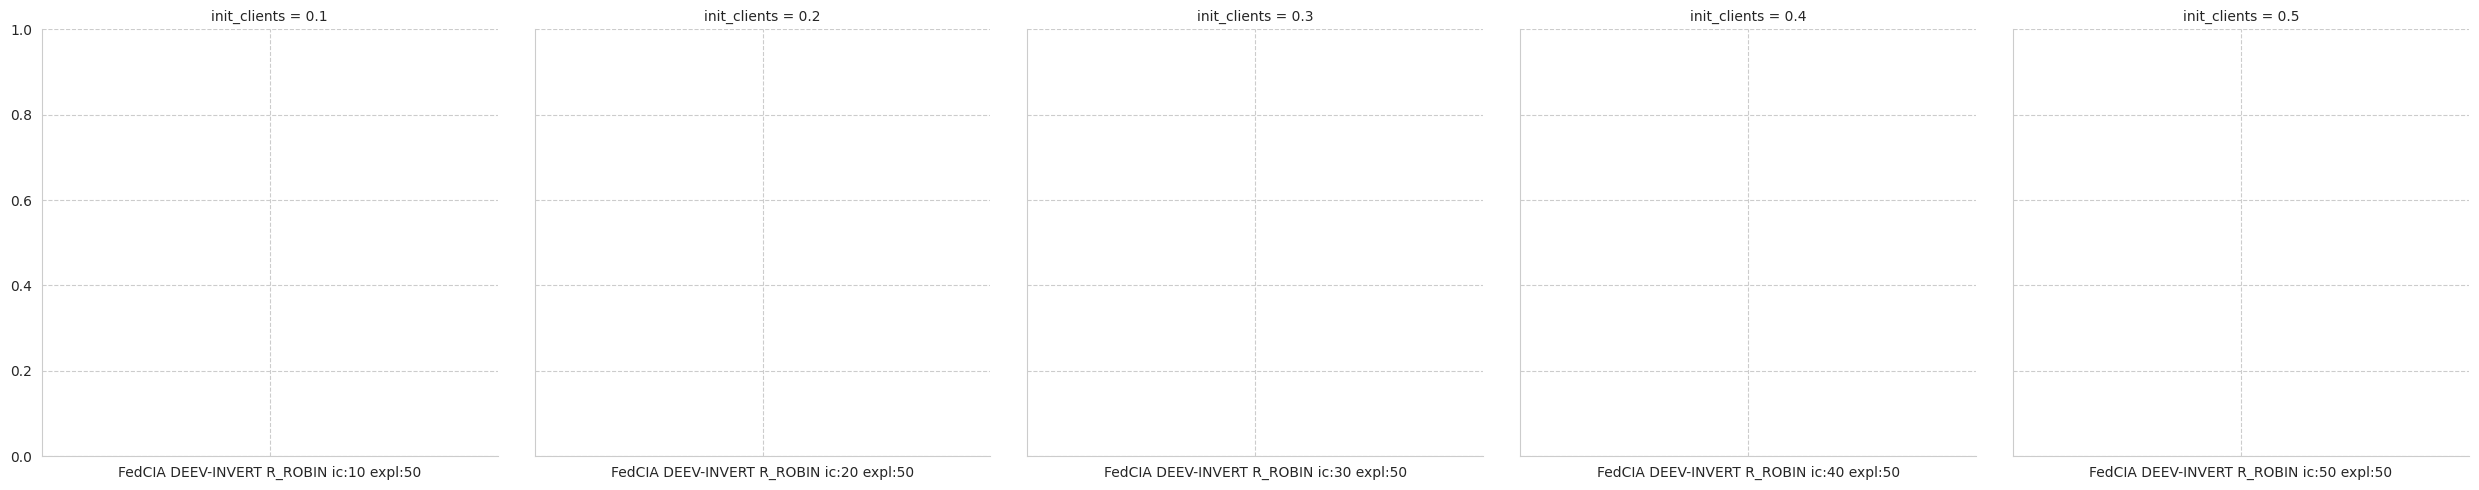

In [118]:
my_boxplot(boxplot_50, bar_legends, "Exploration: 50%", "participating_clients_0.50.eps", config=1)

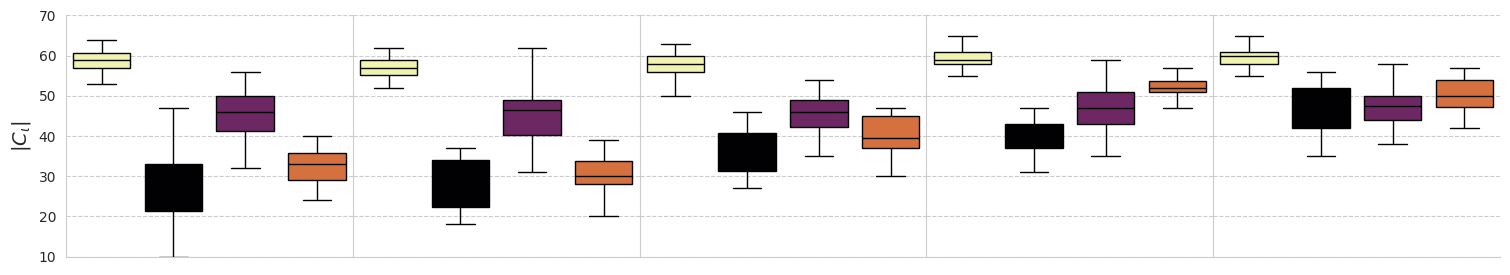

In [61]:
my_boxplot(boxplot_75, bar_legends, "Exploration: 75%", "participating_clients_0.75.eps", config=2)

# ONLY CIA

In [ ]:
only_cia_c = raw_client_data.loc[raw_client_data['tid'].str.contains('LetsFed')]
only_cia_s = raw_server_data.loc[raw_server_data['tid'].str.contains('LetsFed')]
only_cia_c.head(1)

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,tid
225000,1,6,cia,random,dnn,0.2,79.209465,0.11,101.330383,0.657303,...,0.1,True,mnist,0.33,0.25,0.0,0.005,1.0,0.1,LetsFed POC random ic:10 expl:25


In [ ]:
only_cia_legend = []
for key, value in markers_base.items():
    if 'LETSFED' in key:
        only_cia_legend.append(Line2D([0], [0], label=key, color=colors['LETSFED'], marker=value))

## LinePlot

In [ ]:
only_data_25 = only_cia_c.loc[only_cia_c['exploration'] == 0.25]
only_data_50 = only_cia_c.loc[only_cia_c['exploration'] == 0.50]
only_data_75 = only_cia_c.loc[only_cia_c['exploration'] == 0.75]

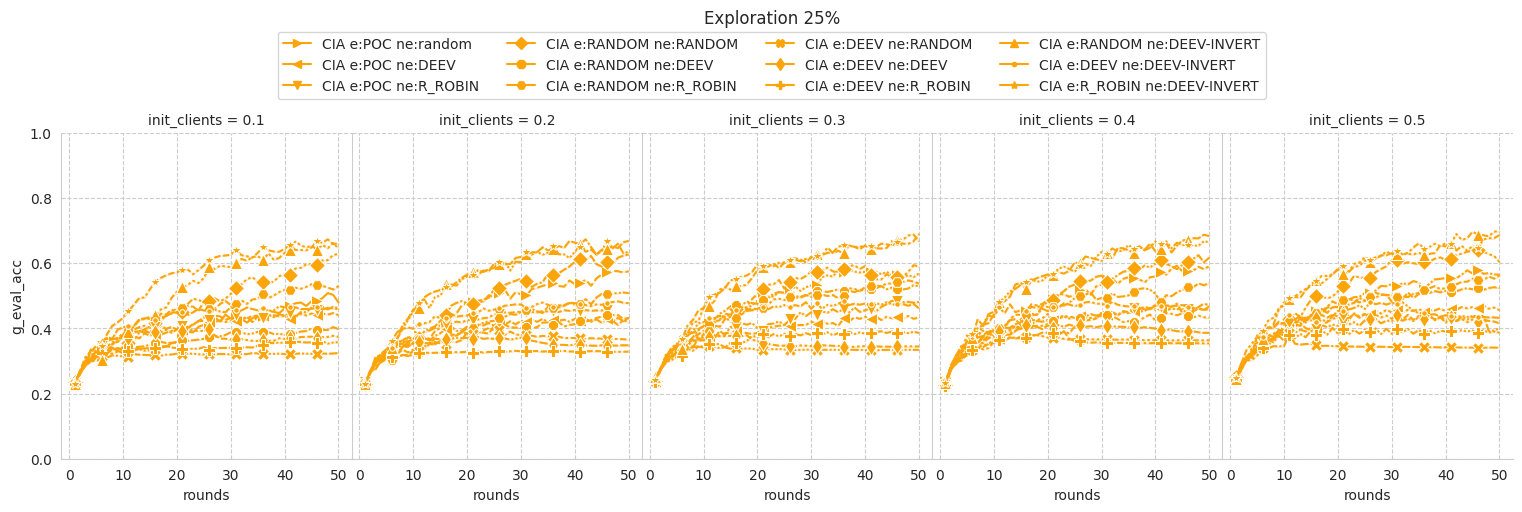

In [ ]:
my_lineplot(only_data_25, only_cia_legend, "Exploration 25%", 'only_acc_0.25.png')

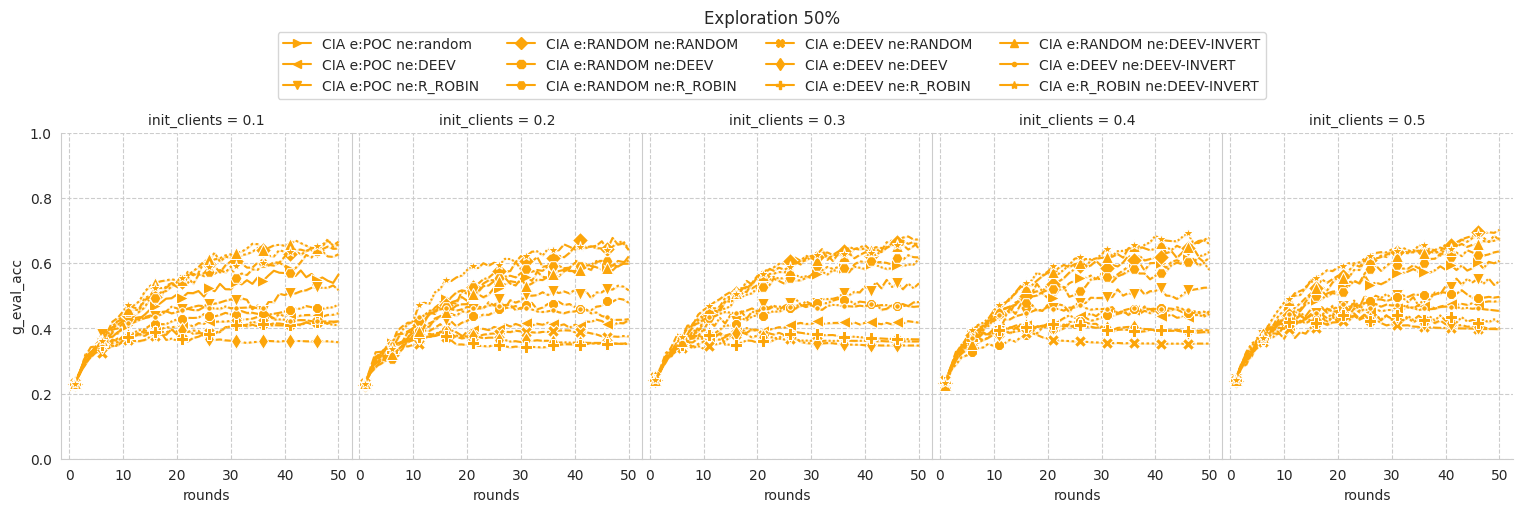

In [ ]:
my_lineplot(only_data_50, only_cia_legend, "Exploration 50%", "only_acc_0.50.png")

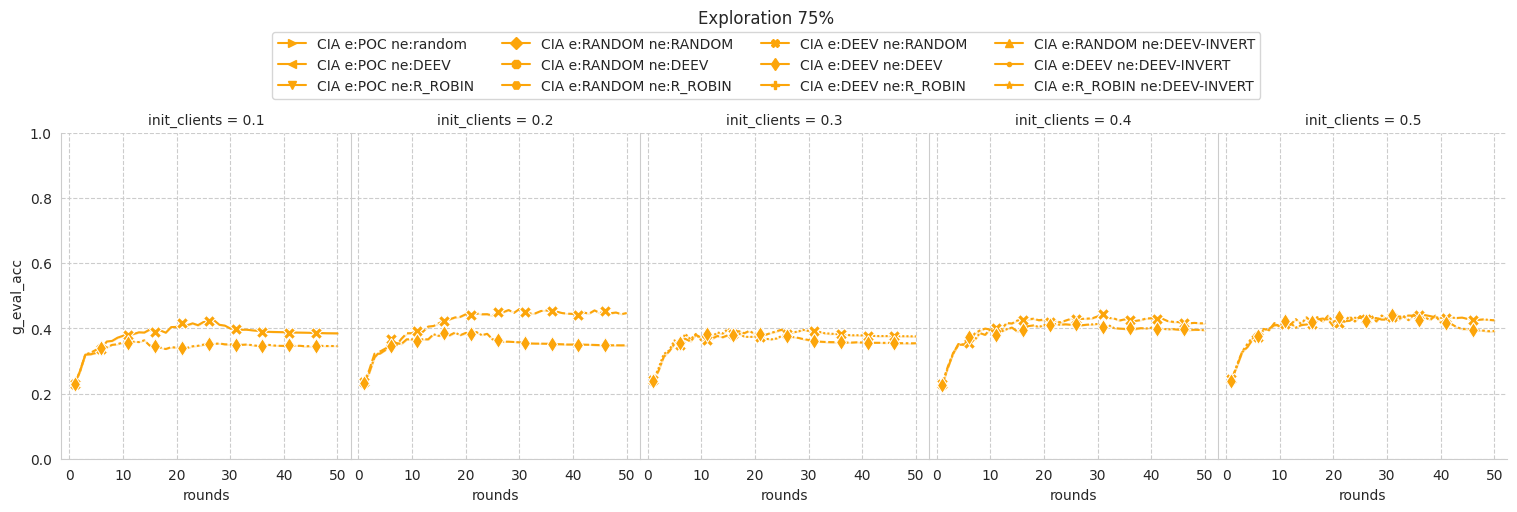

In [ ]:
my_lineplot(only_data_75.loc[
    (only_data_75['tid'].str.contains('DEEV DEEV')) |
    (only_data_75['tid'].str.contains('DEEV random'))
], only_cia_legend, "Exploration 75%", "only_acc_0.75.png")

## Barplot

In [ ]:
only_cia_bar_legends = []
for key, value in barplot_colors.items():
    if "LetsFed" in key:
        only_cia_bar_legends.append(Patch(label=key, color=value))

/tmp/ipykernel_2121409/4251536012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576
/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


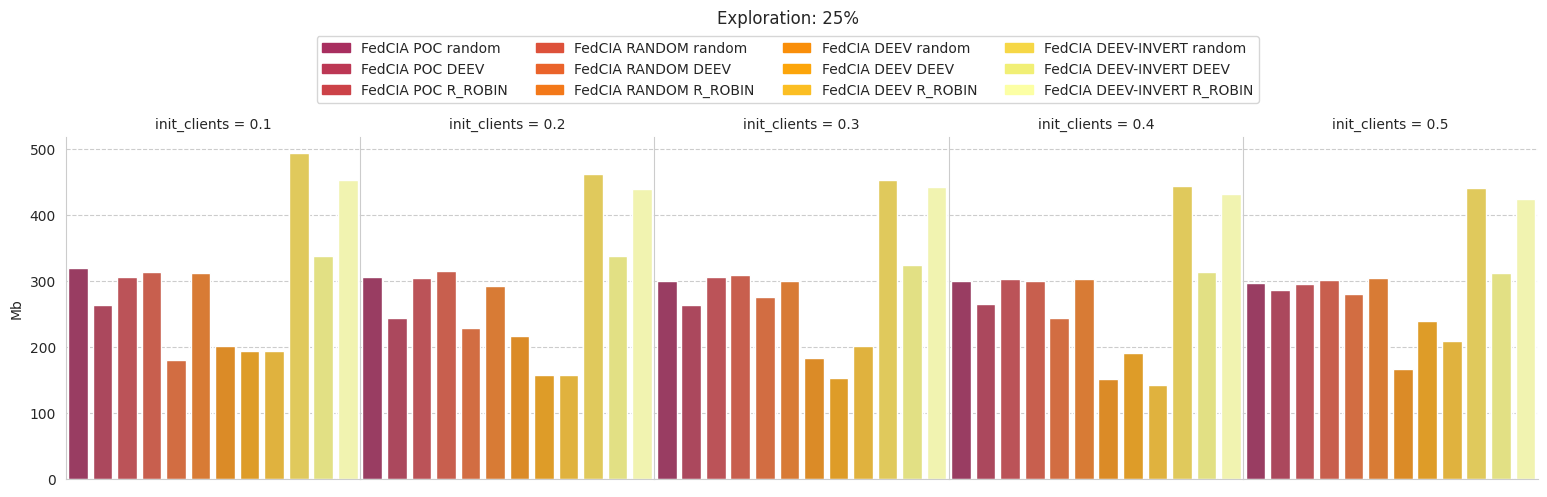

In [ ]:
my_barplot(
    only_data_25,
    only_cia_bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

/tmp/ipykernel_2121409/4251536012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576
/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


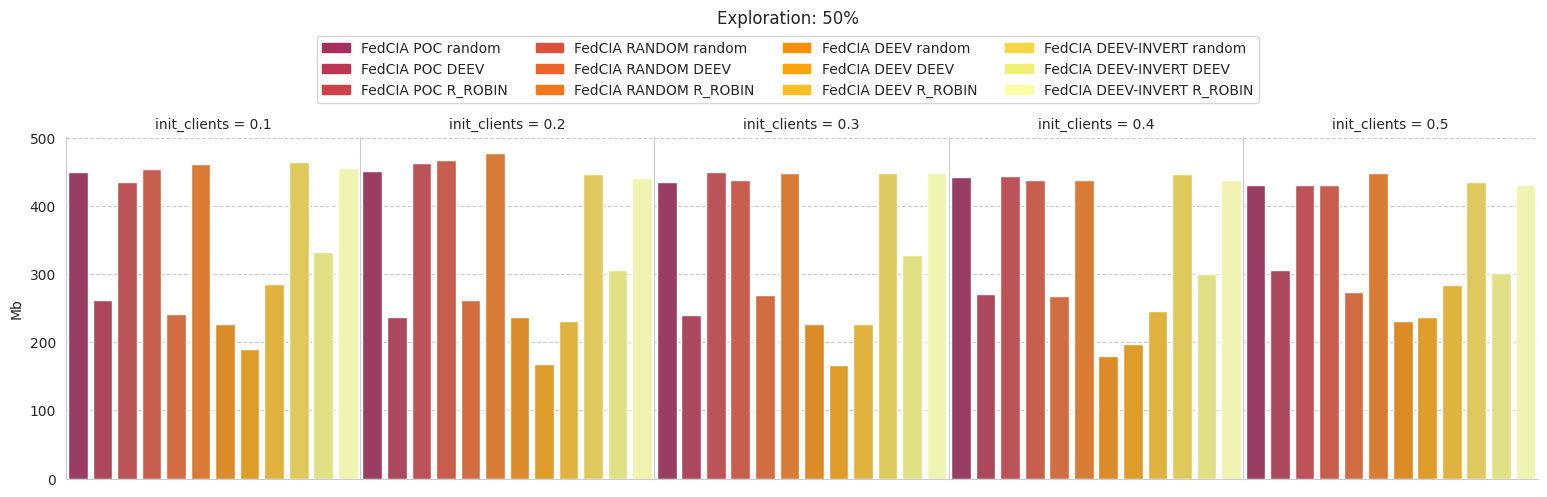

In [ ]:
my_barplot(
    only_data_50,
    only_cia_bar_legends,
    "Exploration: 50%",
    'waste_0.50.png',
)

/tmp/ipykernel_2121409/4251536012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576
/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


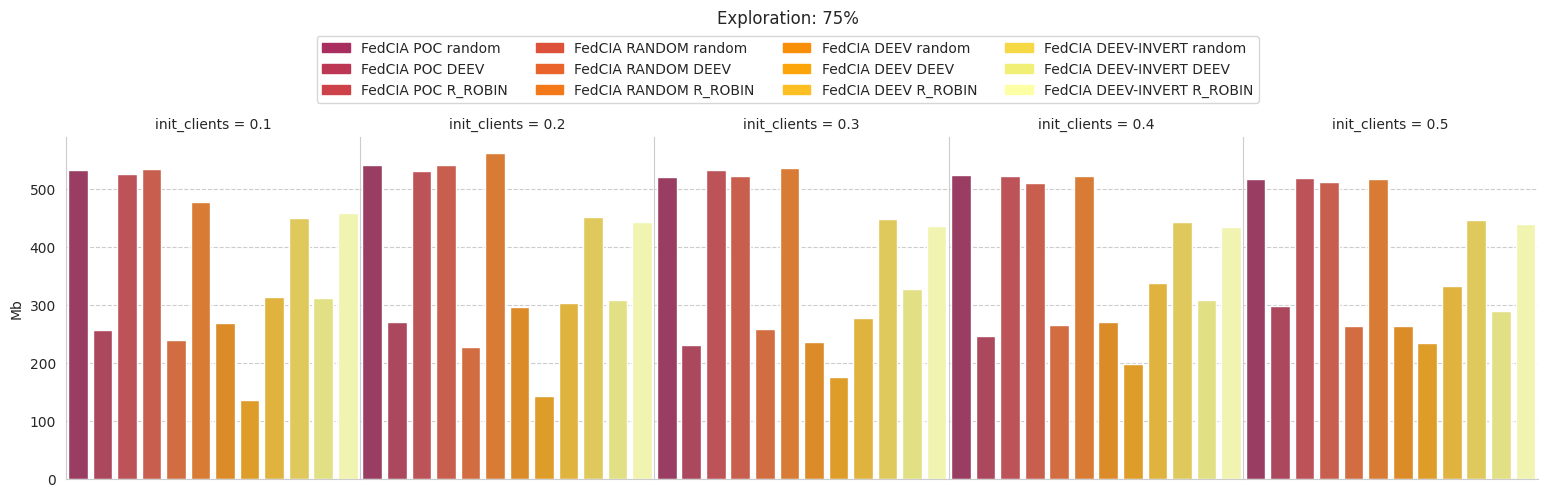

In [ ]:
my_barplot(
    only_data_75,
    only_cia_bar_legends,
    "Exploration: 75%",
    'waste_0.75.png',
)

## Boxplot

In [ ]:
only_cia_boxplot_25 = only_cia_s.loc[only_cia_s['exploration'] == 0.25]
only_cia_boxplot_50 = only_cia_s.loc[only_cia_s['exploration'] == 0.50]
only_cia_boxplot_75 = only_cia_s.loc[only_cia_s['exploration'] == 0.75]

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


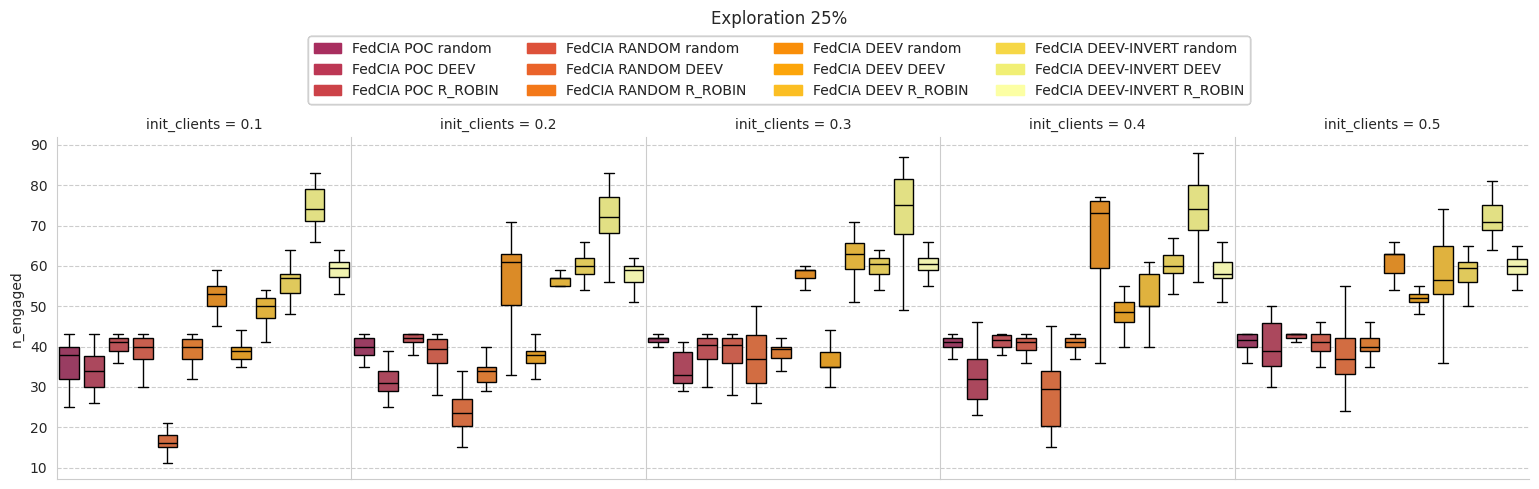

In [ ]:
my_boxplot(
    only_cia_boxplot_25,
    only_cia_bar_legends,
    "Exploration 25%",
    "only_cia_participating_clients_0.25.png"
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


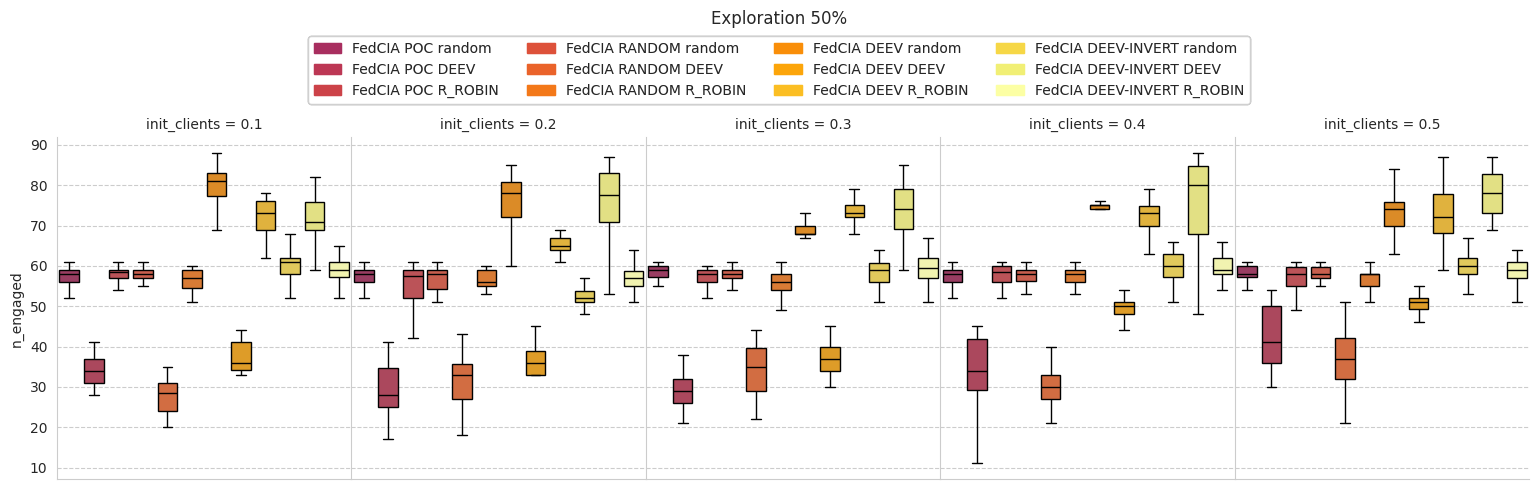

In [ ]:
my_boxplot(
    only_cia_boxplot_50,
    only_cia_bar_legends,
    "Exploration 50%",
    "only_cia_participating_clients_0.50.png"
)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


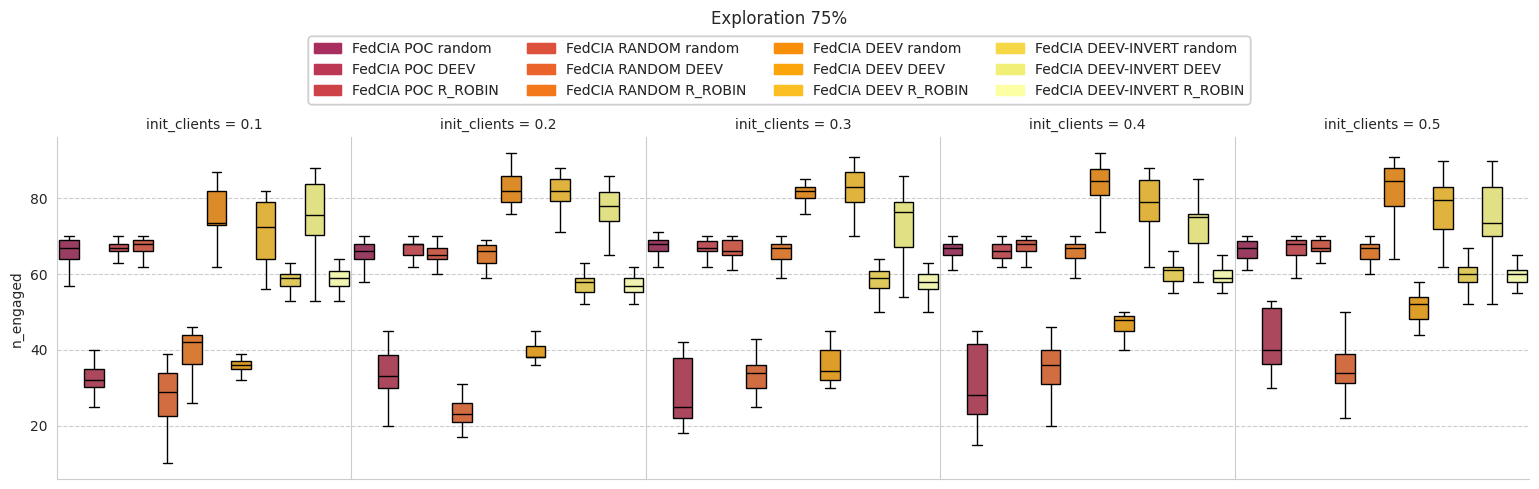

In [ ]:
my_boxplot(
    only_cia_boxplot_75,
    only_cia_bar_legends,
    "Exploration 75%",
    "only_cia_participating_clients_0.75.png"
)

# Only literature

In [ ]:

only_l_data_c = raw_client_data.loc[raw_client_data['tid'].isin(others)]
only_l_data_s = raw_server_data.loc[raw_server_data['tid'].isin(others)]

In [ ]:
only_l_data_c.head()

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,tid
0,1,39,poc,random,dnn,0.06,159.348389,0.08,150.264847,0.263158,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
2,1,10,poc,random,dnn,0.25,60.008072,0.28,67.320770,0.658627,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
3,1,27,poc,random,dnn,0.11,416.876007,0.11,386.322266,0.861199,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
4,1,67,poc,random,dnn,0.26,112.942558,0.23,96.379189,0.747036,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10
5,1,25,poc,random,dnn,0.34,53.102367,0.32,43.373432,0.549383,...,0.1,True,mnist,0.33,0.1,0.0,0.005,1.0,0.1,POC 10 ic:10


In [ ]:
only_cia_legend = []
for key, value in markers_base.items():
    if not 'LETSFED' in key:
        if 'poc' in key.lower():
            color = 'poc'
        elif 'deev' in key.lower():
            color = 'deev'
        else:
            color = 'avg'
        only_cia_legend.append(Line2D([0], [0], label=key, color=colors[color], marker=value))

## Lineplot

KeyboardInterrupt: 

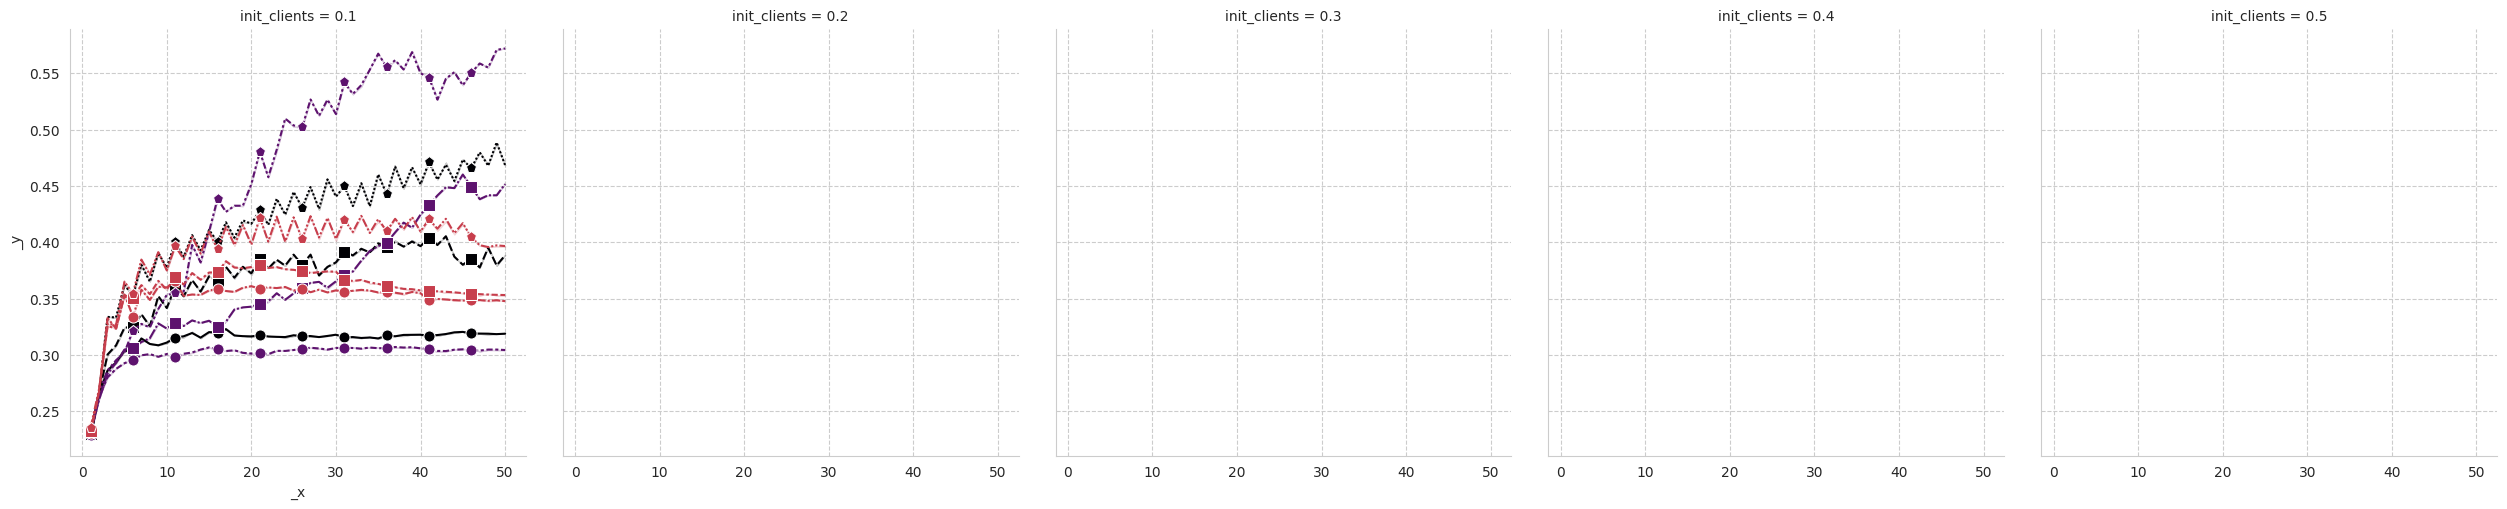

In [ ]:
my_lineplot(
    only_l_data_c,
    only_cia_legend,
    "Literature solutions in dynamic participation scenarios",
    'accuracy_only_l.png',
)

## Barplot

In [ ]:
bar_only_cia_legend = []
for key, value in barplot_colors.items():
    if not "LetsFed" in key:
        bar_only_cia_legend.append(Patch(label=key, color=value))

/tmp/ipykernel_2121409/4251536012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / 1048576
/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


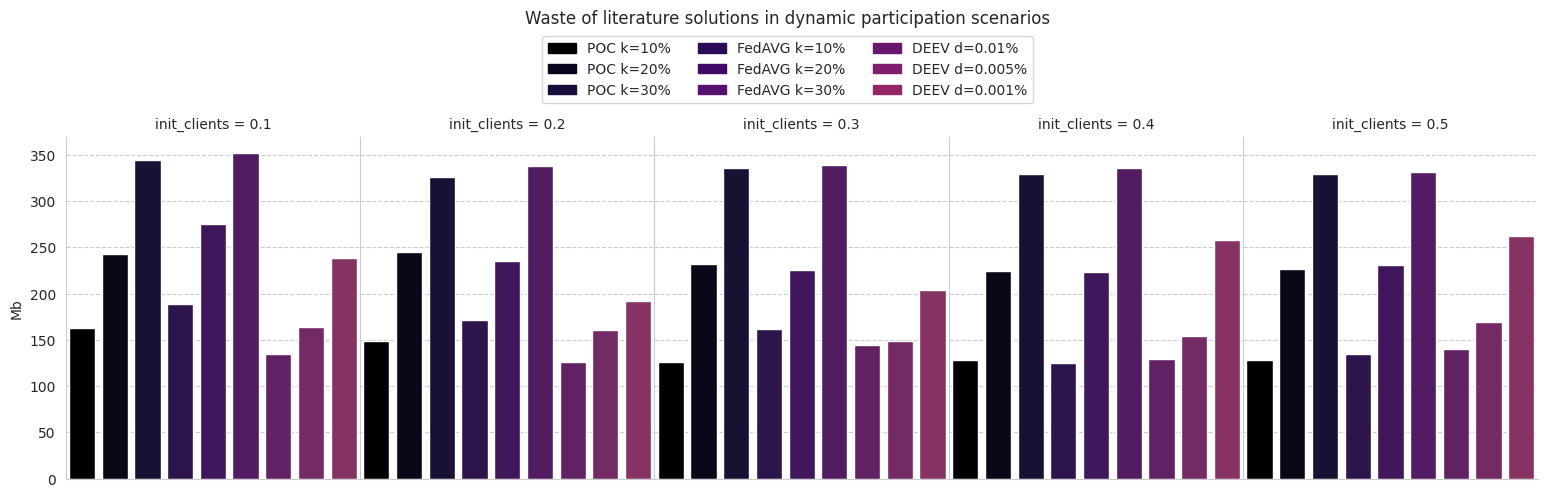

In [ ]:
my_barplot(
    only_l_data_c,
    bar_only_cia_legend,
    "Waste of literature solutions in dynamic participation scenarios",
    'l_waste.png',
)

## Boxplot

In [ ]:
def my_boxplot(df, legends, suptitle, filename_to_save):
    g = sns.catplot(
        data=df,
        y='n_selected',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='box',
        palette=barplot_palette,
        sharey=True,
        sharex=False,
        showfliers = False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
        g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5, 1.1))
    g.set_axis_labels("", 'n_participating_clients')
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save)

/home/rafael.jarczewski/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


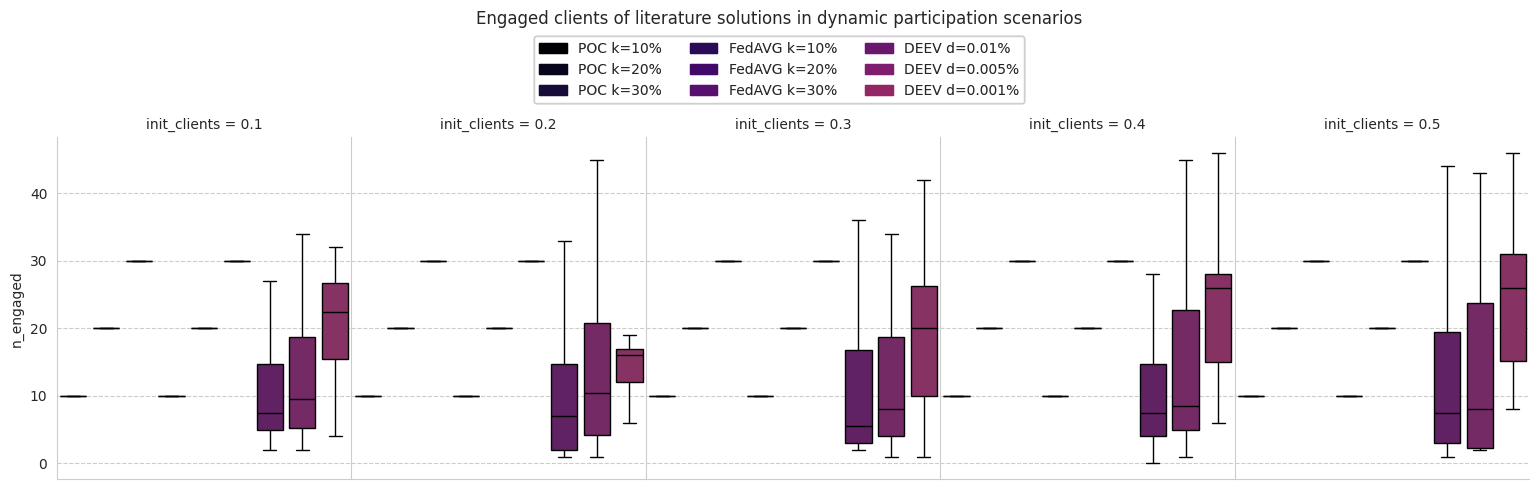

In [ ]:
my_boxplot(
    only_l_data_s,
    bar_only_cia_legend,
    "Engaged clients of literature solutions in dynamic participation scenarios",
    'l_participating_clients.png',
)

# Banda dos clientes que não participaram foram selecionados e passaram a participar

In [129]:
df = data.loc[
    (data['is_selected'] == True) &
    (data['rounds'] > 1)
    # (o_data['old_dynamic_engagement'] == False) &
    # (o_data['desire'] == False)
].groupby(['tid', 'ic', 'exploration'])[['size']].agg({'size': 'sum'})
df['size'] = df['size']/ (1024*1024)
df

,,,size
tid,init_clients,exploration,
LetsFed DEEV-INVERT R_ROBIN ic:10 expl:25,0.1,0.25,840.768883
LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50,0.1,0.50,842.040848
LetsFed DEEV-INVERT R_ROBIN ic:10 expl:75,0.1,0.75,840.344894
LetsFed DEEV-INVERT R_ROBIN ic:20 expl:25,0.2,0.25,822.113396
LetsFed DEEV-INVERT R_ROBIN ic:20 expl:50,0.2,0.50,813.633629
LetsFed DEEV-INVERT R_ROBIN ic:20 expl:75,0.2,0.75,815.753571
LetsFed DEEV-INVERT R_ROBIN ic:30 expl:25,0.3,0.25,841.192871
LetsFed DEEV-INVERT R_ROBIN ic:30 expl:50,0.3,0.50,842.464836
LetsFed DEEV-INVERT R_ROBIN ic:30 expl:75,0.3,0.75,818.721489


In [151]:
def my_barplot_new(df, legends, suptitle, filename_to_save, config=0):
    df['size'] = df['size']
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == False) &
            (df['desire'] == False)
        ],
        y='size',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='bar',
        estimator=sum,
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.fig.set_size_inches(15,3)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    ylabel = r"Data transmitted (Gb)"
    g.set_axis_labels("", ylabel, fontsize=14)
    for i, ax in enumerate(g.axes.flatten()):
        ax.set_xticklabels([])
        if config == 0:
            a = r'Start with $|C_{\iota}|$'
            ax.set_title(f"{a}={ics[i]*100:.0f}")
            ax.set_xlabel("")
            ax.set_xticklabels([])
        else:
            ax.set_title("")
            ax.set_xlabel("")
            ax.set_xticklabels([])
    if config == 0:
        g.fig.legend(handles=legends, ncol=4, loc='center', bbox_to_anchor=(0.5,1.07))
    
    # g.fig.suptitle(suptitle, y=1)
    g.savefig(filename_to_save, dpi=200, format='eps')

def my_barplot_new_v2(df, legends, suptitle, filename_to_save, config=0):
    # Cria a figura e os subplots
    df['size'] = df['size'] / (1024*1024)

    fig, axes = plt.subplots(2, 2, figsize=(7, 6))
    axes = axes.flatten()  # Transforma a grade 2x2 em uma lista plana de eixos

    # Itera sobre os subplots para desenhar os gráficos de barras
    for i, ax in enumerate(axes):
        ax.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')
        # Filtra os dados baseados em 'ic' para cada subplot
        init_client = df['ic'].unique()[i % len(df['ic'].unique())]
        filtered_df = df[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == False) &
            (df['desire'] == False) &
            (df['ic'] == init_client)
        ]

        # Desenha o gráfico de barras no subplot correspondente
        sns.barplot(
            x='tid',
            y='size',
            hue='tid',  # Ajustar para os dados desejados, se necessário
            data=filtered_df,
            estimator=sum,
            palette=barplot_palette,
            ax=ax,
            edgecolor='black',
        )
        if config == 0:
            title = f"Start with $|C_{{\iota}}|={ics[i+1]*100:.0f}$"
            ax.set_title(title)
        else:
            ax.set_title("")
        # Configurações de cada subplot
        ax.set_axisbelow(True)  
        ax.set_ylabel('Data transmitted (Mb)' if i % 2 == 0 else "", fontsize=14)
        ax.set_xlabel('')  # Remove os rótulos do eixo X
        ax.set_xticklabels([])  # Remove os rótulos do eixo X
        ax.label_outer()  # Gerencia os rótulos de eixo para reduzir duplicação
    # Ajustes finais na figura
    fig.legend(handles=bar_legends, ncol=4, loc='center', bbox_to_anchor=(0.5, 0.95), frameon=False)
    plt.subplots_adjust(hspace=0.19, wspace=0.05)
    # Salva o gráfico
    plt.savefig(filename_to_save, dpi=200, format='eps')



### Exploration 25%

In [152]:
barplot_palette

{'POC 30 ic:10': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:10': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:10': (0.30196078431372547,
  0.6862745098039216,
  0.2901960784313726),
 'POC 30 ic:20': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:20': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:20': (0.30196078431372547,
  0.6862745098039216,
  0.2901960784313726),
 'POC 30 ic:30': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:30': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:30': (0.30196078431372547,
  0.6862745098039216,
  0.2901960784313726),
 'POC 30 ic:40': (0.8941176470588236,
  0.10196078431372549,
  0.10980392156862745),
 'AVG 30 ic:40': (0.21568627450980393,
  0.49411764705882355,
  0.7215686274509804),
 'DEEV 0.001 ic:40': (0.30196078431372547,
  0.686274509

/tmp/ipykernel_13543/2784088779.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'] / (1024*1024)


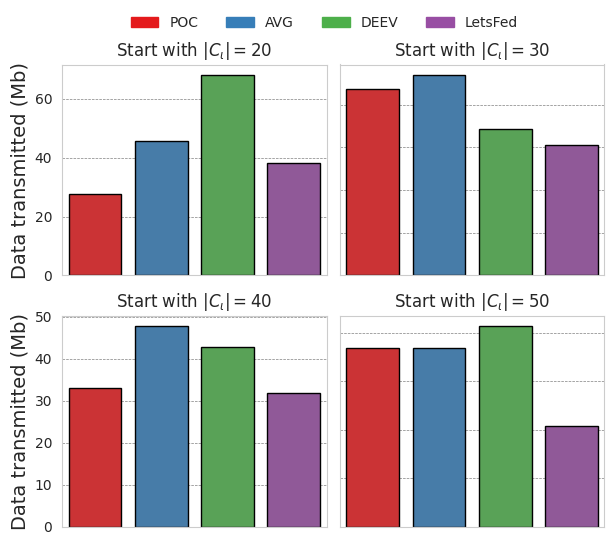

In [153]:
my_barplot_new_v2(
    data_25.loc[~(data_25['ic'] == 0.1)],
    bar_legends,
    "Exploration: 25%",
    'new_waste_25.eps',
    config=0
)

In [78]:
import numpy as np
def calculate_economia(df, perc):
    d = df.loc[
        (df['is_selected'] == True) &
        (df['rounds'] > 1) &
        (df['old_dynamic_engagement'] == False) &
        (df['desire'] == False) &
        (df['ic'] == perc)
    ]

    sol = ['LETSFED', 'POC', 'AVG', '0.001']

    r = []

    for s in sol:
        r.append(d.loc[d['tid'].str.contains(s)]['size'].sum())
    print(np.array(r)/(1024*1024))
    for i, s in enumerate(sol):
        if i > 0:
            print(f"{s}: {(r[i] - r[0])/r[i]:.2f}")

In [79]:
calculate_economia(data_25,0.1)
calculate_economia(data_25,0.2)
calculate_economia(data_25,0.3)
calculate_economia(data_25,0.4)
calculate_economia(data_25,0.5)

[43.67079926 49.18264771 61.47830963 36.88698578]
POC: 0.11
AVG: 0.29
0.001: -0.18
[38.15895081 27.55924225 45.79074097 68.26212311]
POC: -0.38
AVG: 0.17
0.001: 0.44
[30.52716064 43.67079926 47.06270599 34.34305573]
POC: 0.30
AVG: 0.35
0.001: 0.11
[31.79912567 33.0710907  47.91068268 42.82282257]
POC: 0.04
AVG: 0.34
0.001: 0.26
[20.77542877 36.88698578 36.88698578 41.55085754]
POC: 0.44
AVG: 0.44
0.001: 0.50


In [138]:
my_barplot(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

NameError: name 'my_barplot' is not defined

### Exploration 50%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


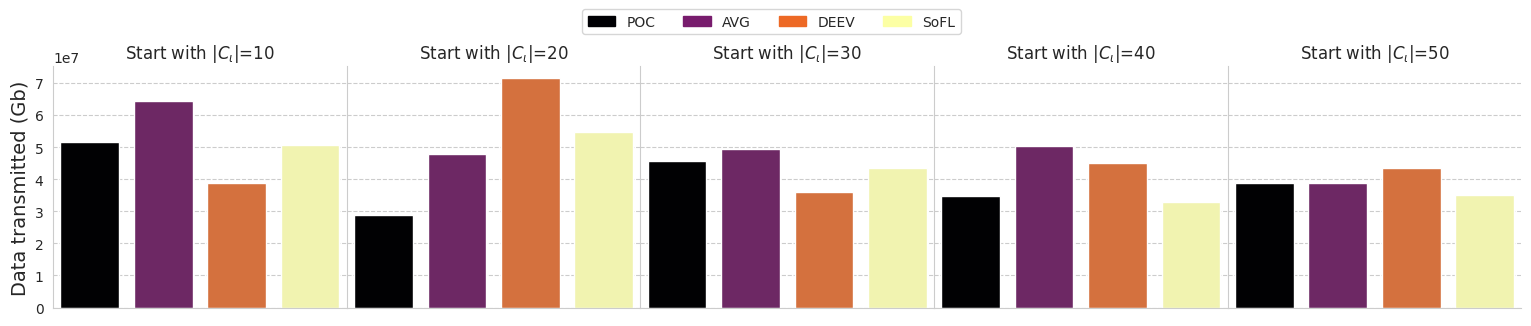

In [122]:
my_barplot_new(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'waste_50.eps',
    config=0
)

In [80]:
calculate_economia(data_50, 0.1)
calculate_economia(data_50, 0.2)
calculate_economia(data_50, 0.3)
calculate_economia(data_50, 0.4)
calculate_economia(data_50, 0.5)

[48.33467102 49.18264771 61.47830963 36.88698578]
POC: 0.02
AVG: 0.21
0.001: -0.31
[52.1505661  27.55924225 45.79074097 68.26212311]
POC: -0.89
AVG: -0.14
0.001: 0.24
[41.55085754 43.67079926 47.06270599 34.34305573]
POC: 0.05
AVG: 0.12
0.001: -0.21
[31.37513733 33.0710907  47.91068268 42.82282257]
POC: 0.05
AVG: 0.35
0.001: 0.27
[33.49507904 36.88698578 36.88698578 41.55085754]
POC: 0.09
AVG: 0.09
0.001: 0.19


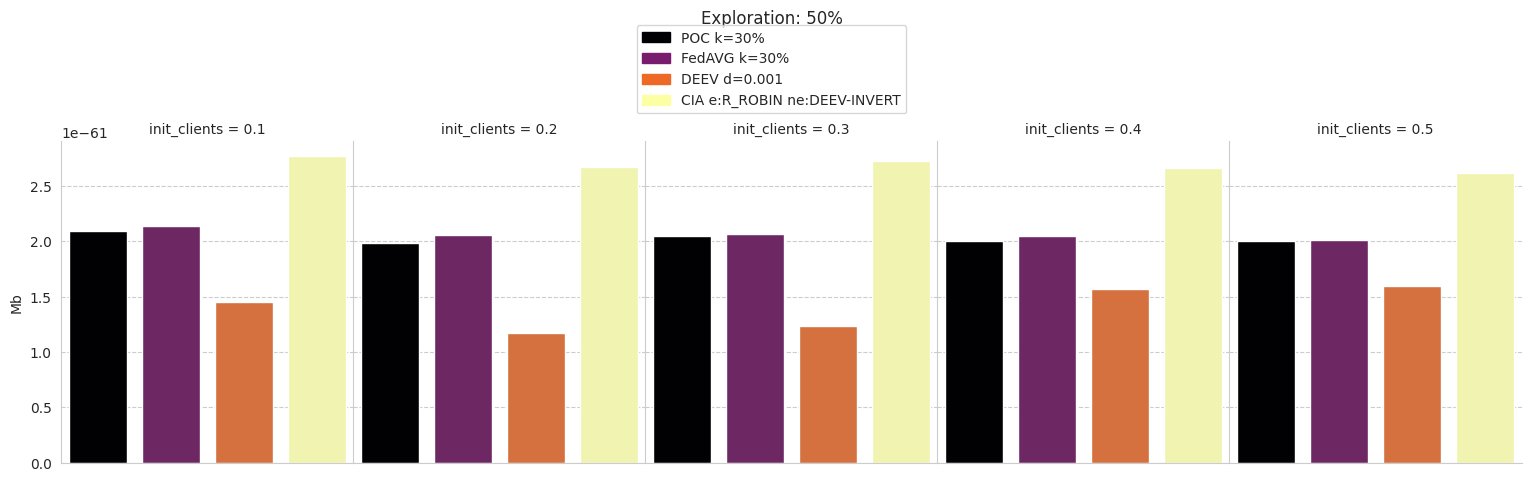

In [193]:
my_barplot(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

### Exploration 75%

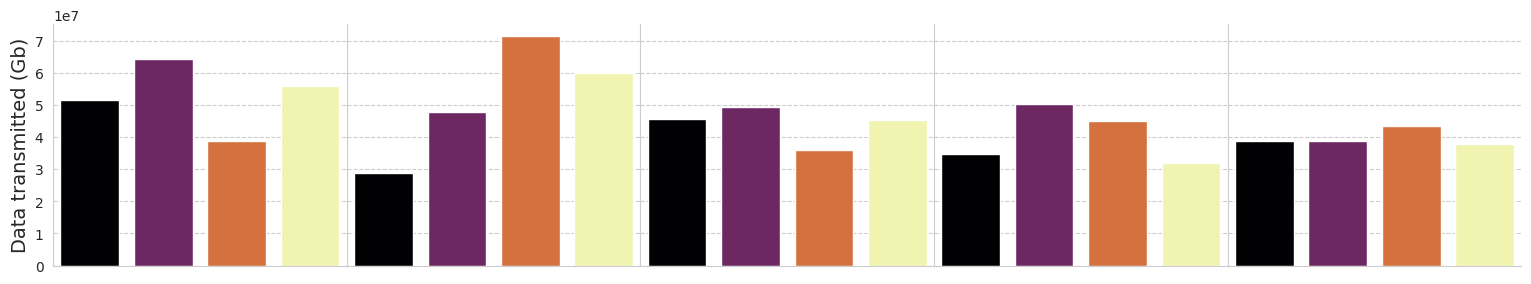

In [53]:
my_barplot_new(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'waste_75.eps',
    config=2
)

In [81]:
calculate_economia(data_75, 0.1)
calculate_economia(data_75, 0.2)
calculate_economia(data_75, 0.3)
calculate_economia(data_75, 0.4)
calculate_economia(data_75, 0.5)

[53.42253113 49.18264771 61.47830963 36.88698578]
POC: -0.09
AVG: 0.13
0.001: -0.45
[57.23842621 27.55924225 45.79074097 68.26212311]
POC: -1.08
AVG: -0.25
0.001: 0.16
[43.24681091 43.67079926 47.06270599 34.34305573]
POC: 0.01
AVG: 0.08
0.001: -0.26
[30.52716064 33.0710907  47.91068268 42.82282257]
POC: 0.08
AVG: 0.36
0.001: 0.29
[36.03900909 36.88698578 36.88698578 41.55085754]
POC: 0.02
AVG: 0.02
0.001: 0.13


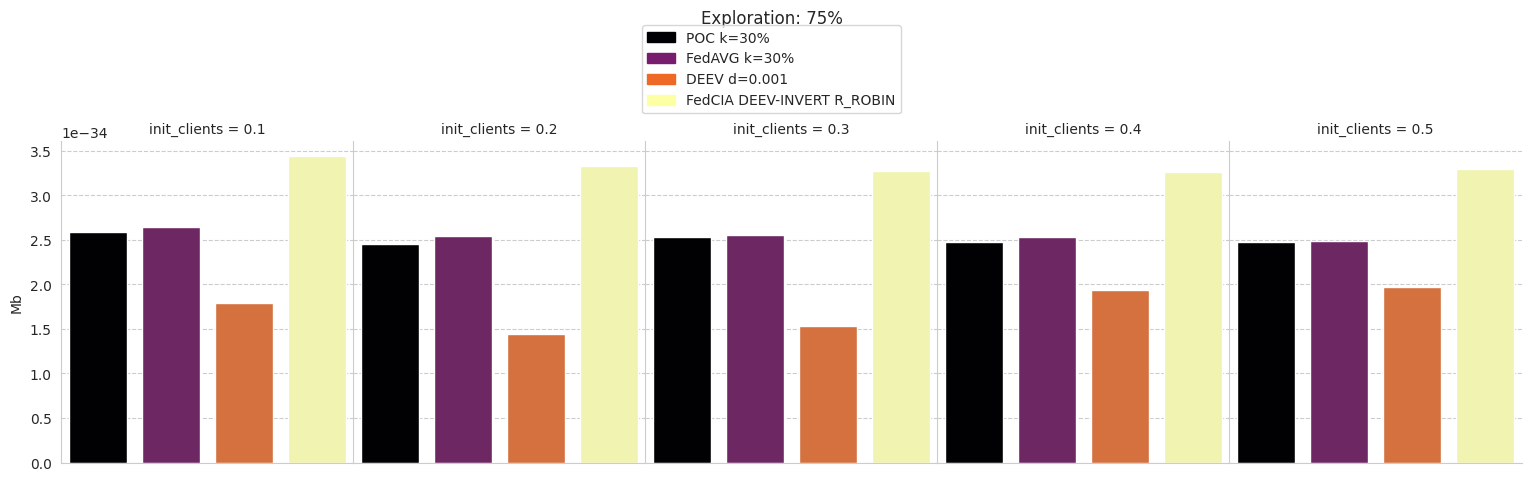

In [156]:
my_barplot(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

# Quantas vezes selecionou e os clientes sairam da federação

In [483]:
def my_barplot_new_v2(df, legends, suptitle, filename_to_save):
    df['size'] = df['size'] / 1048576
    g = sns.catplot(
        data=df.loc[
            (df['is_selected'] == True) &
            (df['rounds'] > 1) &
            (df['old_dynamic_engagement'] == True) &
            (df['desire'] == False)
        ],
        y='size',
        x='tid',
        hue=df[['tid', 'ic']].apply(tuple, axis=1),
        col='ic',
        kind='bar',
        estimator=sum,
        palette=barplot_palette,
        sharey=True,
        sharex=False,
    )
    g._legend.remove()
    g.set_axis_labels("", "Mb")
    g.fig.set_size_inches(15,4)
    g.fig.subplots_adjust(right=1, hspace=0, wspace=0)
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.legend(handles=legends, ncol=int(len(legends)/3), loc='center', bbox_to_anchor=(0.5,1.1))
    for ax in g.axes.flatten():
        ax.set_xticklabels([])
    g.fig.suptitle(suptitle, y=1.25)
    g.savefig(filename_to_save, dpi=500)


### Exploration 25%

In [484]:
my_barplot_new_v2(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'teste.png',
)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 0x500 with 0 Axes>

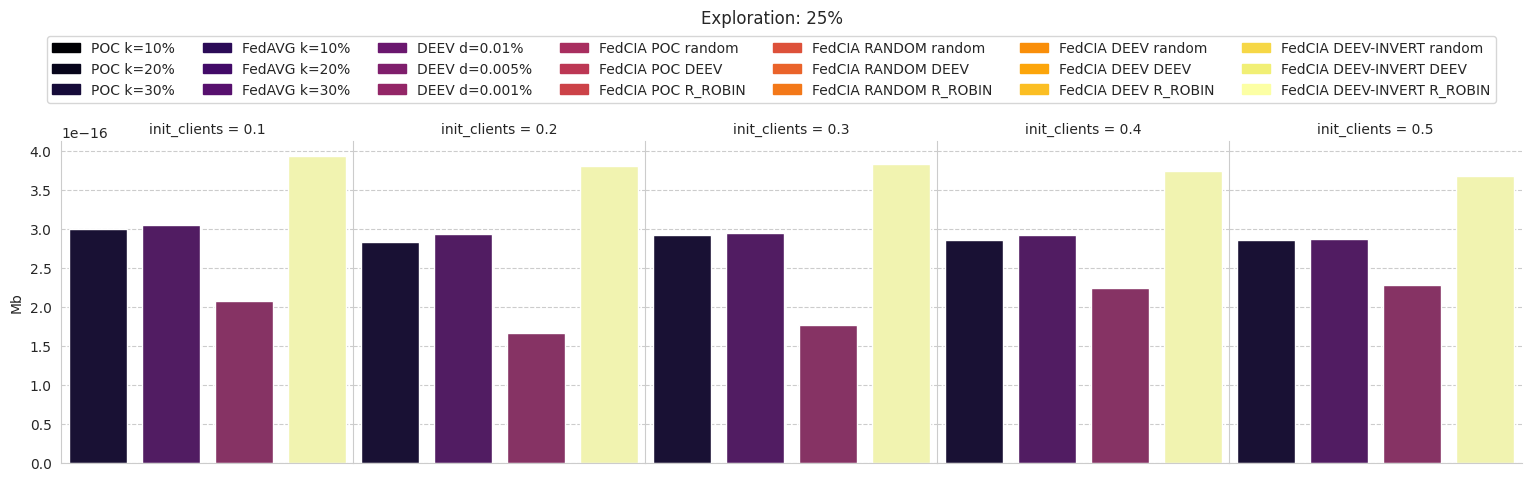

In [ ]:
my_barplot(
    data_25,
    bar_legends,
    "Exploration: 25%",
    'waste_0.25.png',
)

### Exploration 50%

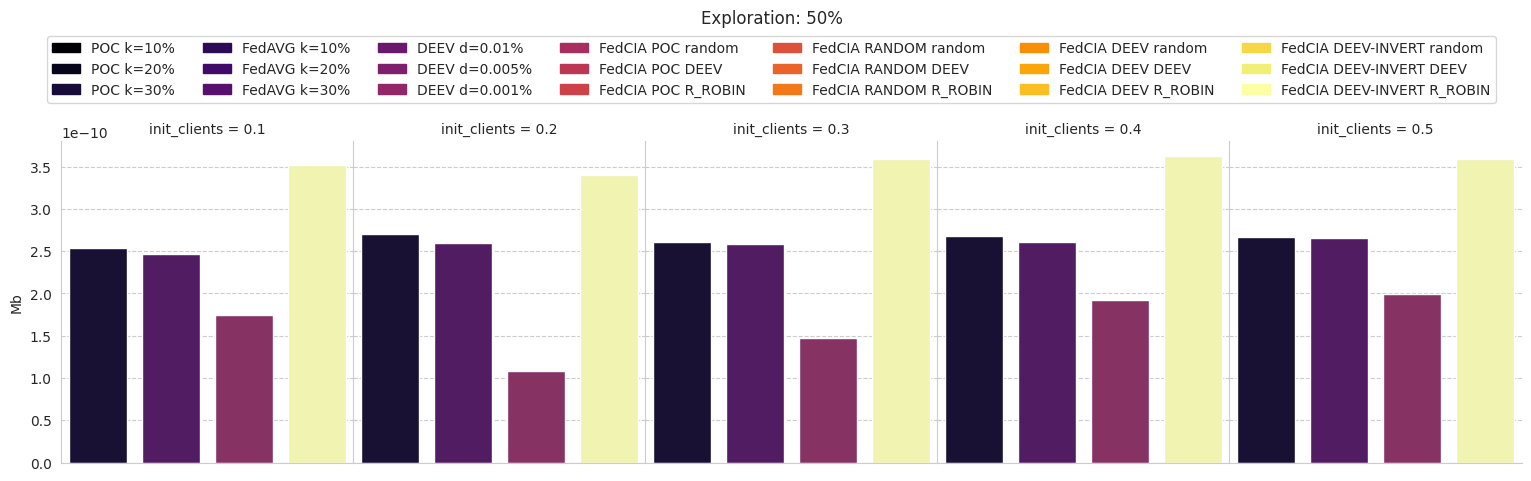

In [ ]:
my_barplot_new_v2(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

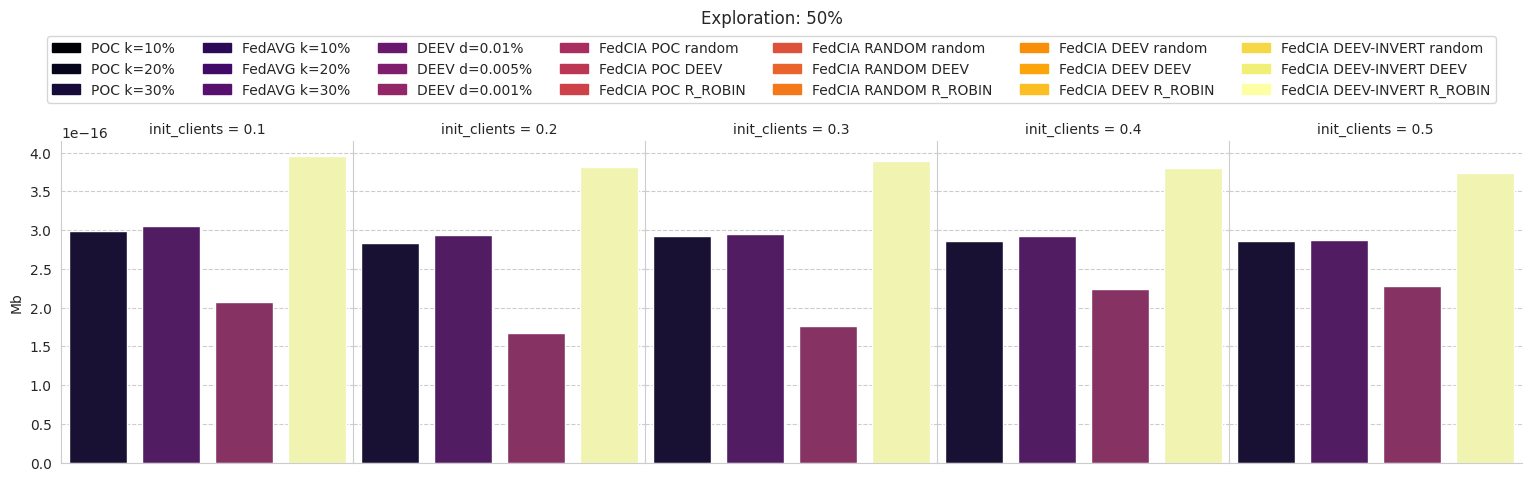

In [ ]:
my_barplot(
    data_50,
    bar_legends,
    "Exploration: 50%",
    'teste.png',
)

### Exploration 75%

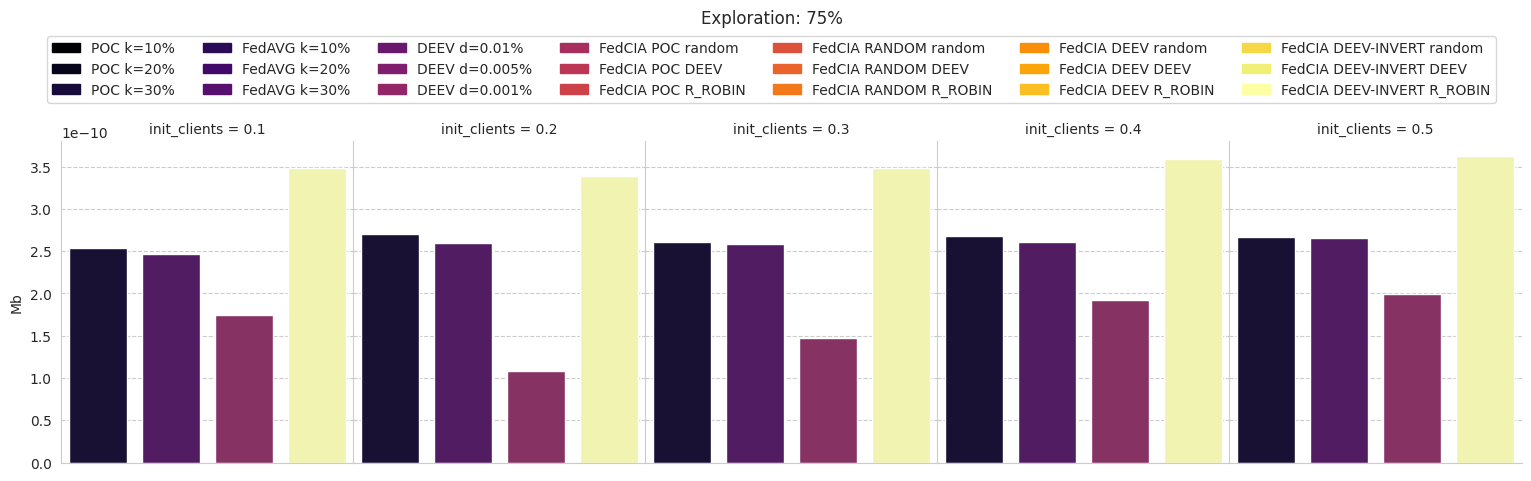

In [ ]:
my_barplot_new_v2(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

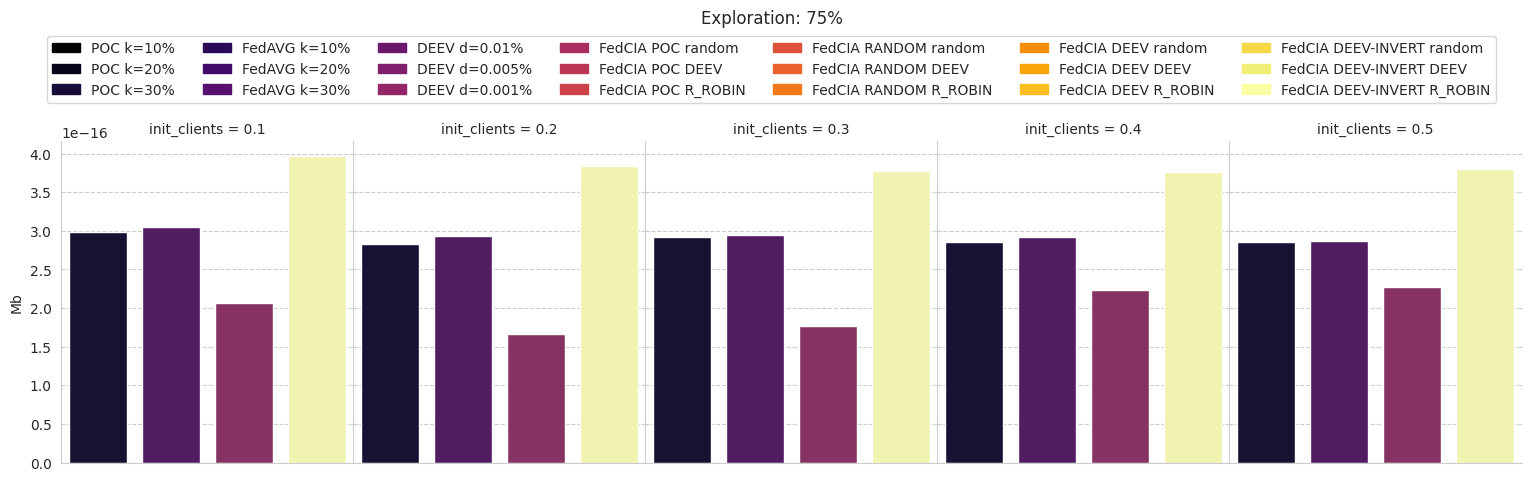

In [ ]:
my_barplot(
    data_75,
    bar_legends,
    "Exploration: 75%",
    'teste.png',
)

# Compare literature

In [ ]:
c_data_100 = pd.read_csv('logs/c-data.csv')
s_data_100 = pd.read_csv('logs/s-data.csv')

In [ ]:
# c_data_100.to_csv("logs/c-data.csv", index=False)
# s_data_100.to_csv("logs/s-data.csv", index=False)

In [ ]:
compare_labels = [
    "Normal-POC", "POC",
    "Normal-AVG", "AVG",
    "Normal-DEEV", "DEEV",
]
c = plt.cm.inferno(np.linspace(0,1, len(compare_labels)))
compare_colors = dict(zip(compare_labels, c))
compare_colors

{'Normal-POC': array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
 'POC': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'Normal-AVG': array([0.578304, 0.148039, 0.404411, 1.      ]),
 'AVG': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'Normal-DEEV': array([0.987622, 0.64532 , 0.039886, 1.      ]),
 'DEEV': array([0.988362, 0.998364, 0.644924, 1.      ])}

In [ ]:
compare_labels_default = c_data_100['tid'].unique()
line_plot_palette = dict()
for key in compare_labels_default:
    if 'poc' in key.lower():
        value = compare_colors['POC']
        if 'ic:100' in key:
            value = compare_colors['Normal-POC']
        line_plot_palette[key] = value
    if 'avg' in key.lower():
        value = compare_colors['AVG']
        if 'ic:100' in key:
            value = compare_colors['Normal-AVG']
        line_plot_palette[key] = value
    if 'deev' in key.lower():
        value = compare_colors['DEEV']
        if 'ic:100' in key:
            value = compare_colors['Normal-DEEV']
        line_plot_palette[key] = value
line_plot_palette

{'POC 10 ic:10': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'POC 20 ic:10': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'POC 30 ic:10': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'AVG 10 ic:10': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'AVG 20 ic:10': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'AVG 30 ic:10': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'DEEV 0.01 ic:10': array([0.988362, 0.998364, 0.644924, 1.      ]),
 'DEEV 0.005 ic:10': array([0.988362, 0.998364, 0.644924, 1.      ]),
 'DEEV 0.001 ic:10': array([0.988362, 0.998364, 0.644924, 1.      ]),
 'POC 10 ic:20': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'POC 20 ic:20': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'POC 30 ic:20': array([0.258234, 0.038571, 0.406485, 1.      ]),
 'AVG 10 ic:20': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'AVG 20 ic:20': array([0.865006, 0.316822, 0.226055, 1.      ]),
 'AVG 30 ic:20': array([0.865006, 0.316822, 0.226055, 1.      ]),

In [ ]:
compare_markers_base = {
    "POC k=10%": "o",
    "POC k=20%": "s",
    "POC k=30%": "P",
    "AVG k=10%": "o",
    "AVG k=20%": "s",
    "AVG k=30%": "P",
    "DEEV d=0.01": "o",
    "DEEV d=0.005": "s",
    "DEEV d=0.001": "P",
}
compare_markers = {
    'POC 10 ic:10': compare_markers_base['POC k=10%'],
    'POC 20 ic:10': compare_markers_base['POC k=20%'],
    'POC 30 ic:10': compare_markers_base['POC k=30%'],
    'AVG 10 ic:10': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:10': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:10': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:10': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:10': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:10': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:20': compare_markers_base['POC k=10%'],
    'POC 20 ic:20': compare_markers_base['POC k=20%'],
    'POC 30 ic:20': compare_markers_base['POC k=30%'],
    'AVG 10 ic:20': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:20': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:20': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:20': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:20': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:20': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:30': compare_markers_base['POC k=10%'],
    'POC 20 ic:30': compare_markers_base['POC k=20%'],
    'POC 30 ic:30': compare_markers_base['POC k=30%'],
    'AVG 10 ic:30': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:30': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:30': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:30': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:30': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:30': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:40': compare_markers_base['POC k=10%'],
    'POC 20 ic:40': compare_markers_base['POC k=20%'],
    'POC 30 ic:40': compare_markers_base['POC k=30%'],
    'AVG 10 ic:40': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:40': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:40': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:40': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:40': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:40': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:50': compare_markers_base['POC k=10%'],
    'POC 20 ic:50': compare_markers_base['POC k=20%'],
    'POC 30 ic:50': compare_markers_base['POC k=30%'],
    'AVG 10 ic:50': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:50': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:50': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:50': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:50': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:50': compare_markers_base['DEEV d=0.001'],
    'POC 10 ic:100': compare_markers_base['POC k=10%'],
    'POC 20 ic:100': compare_markers_base['POC k=20%'],
    'POC 30 ic:100': compare_markers_base['POC k=30%'],
    'AVG 10 ic:100': compare_markers_base['AVG k=10%'],
    'AVG 20 ic:100': compare_markers_base['AVG k=20%'],
    'AVG 30 ic:100': compare_markers_base['AVG k=30%'],
    'DEEV 0.01 ic:100': compare_markers_base['DEEV d=0.01'],
    'DEEV 0.005 ic:100': compare_markers_base['DEEV d=0.005'],
    'DEEV 0.001 ic:100': compare_markers_base['DEEV d=0.001'],
}


In [ ]:
# sns.lineplot(
#     data=data.loc[data['tid'].str.contains("DEEV")],
#     x='rounds',
#     y='g_eval_acc',
#     hue='tid',
#     errorbar=('ci', False)
# )

# TESTES

In [440]:
def get_data(c_df_to_use, s_df_to_use):
    df = c_df_to_use.loc[
        (c_df_to_use['is_selected'] == True) &
        (c_df_to_use['old_dynamic_engagement'] == True) &
        (c_df_to_use['desire'] == True)
    ].groupby(['tid', 'rounds']).count()
    df = df.rename(columns={'cid': 'no_swap_engagement'}).reset_index()
    new_df = pd.merge(
        s_df_to_use, 
        df[['tid', 'rounds', 'no_swap_engagement']],
        how='left', left_on=['tid', 'rounds'],
        right_on=['tid', 'rounds']
    )[['tid', 'ic', 'rounds', 'no_swap_engagement', 'exploration']].fillna(0)
    # ---------------------------------------------
    df = c_df_to_use.loc[
        (c_df_to_use['is_selected'] == True) &
        (c_df_to_use['old_dynamic_engagement'] == True) &
        (c_df_to_use['desire'] == False)
    ].groupby(['tid', 'rounds']).count()
    df = df.rename(columns={'cid': 'amount'}).reset_index()
    new_df['swap_engagement'] = pd.merge(
        s_df_to_use,
        df[['tid', 'rounds', 'amount']],
        how='left', left_on=['tid', 'rounds'],
        right_on=['tid', 'rounds']
    )[['tid', 'ic', 'rounds', 'amount', 'exploration']].fillna(0)['amount']
    # ---------------------------------------------
    df = c_df_to_use.loc[
        (c_df_to_use['is_selected'] == True) &
        (c_df_to_use['old_dynamic_engagement'] == False) &
        (c_df_to_use['desire'] == False)
    ].groupby(['tid', 'rounds']).count()
    df = df.rename(columns={'cid': 'amount'}).reset_index()
    new_df['no_swap_not_engagement'] = pd.merge(
        s_df_to_use,
        df[['tid', 'rounds', 'amount']],
        how='left', left_on=['tid', 'rounds'],
        right_on=['tid', 'rounds']
    )[['tid', 'ic', 'rounds', 'amount', 'exploration']].fillna(0)['amount']
    # ---------------------------------------------
    df = c_df_to_use.loc[
        (c_df_to_use['is_selected'] == True) &
        (c_df_to_use['old_dynamic_engagement'] == False) &
        (c_df_to_use['desire'] == True)
    ].groupby(['tid', 'rounds']).count()
    df = df.rename(columns={'cid': 'amount'}).reset_index()
    new_df['swap_not_engagement'] = pd.merge(
        s_df_to_use, df[['tid', 'rounds', 'amount']],
        how='left',
        left_on=['tid', 'rounds'],
        right_on=['tid', 'rounds']
    )[['tid', 'ic', 'rounds', 'amount', 'exploration']].fillna(0)['amount']
    # ---------------------------------------------
    new_df['gain'] = new_df['swap_not_engagement'] - new_df['swap_engagement']
    return new_df

In [441]:
new_df = get_data(data_50, s_data_50.loc[(s_data_50['tid'].isin(only) | s_data_50['tid'].isin(filter_data))])
new_df.tail()

,tid,init_clients,rounds,no_swap_engagement,exploration,swap_engagement,no_swap_not_engagement,swap_not_engagement,gain
995,LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50,0.5,46,0.0,0.5,18.0,0.0,20.0,2.0
996,LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50,0.5,47,0.0,0.5,18.0,1.0,16.0,-2.0
997,LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50,0.5,48,0.0,0.5,18.0,9.0,14.0,-4.0
998,LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50,0.5,49,0.0,0.5,16.0,2.0,23.0,7.0
999,LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50,0.5,50,0.0,0.5,19.0,2.0,18.0,-1.0


### Diferença entre migração de grupos entre clientes
- *Saldo*, essa métrica representa a quantidade de clientes que passaram de engagement para not engagement por round.
- *Negativo*: Significa que teve mais clientes que estavam participando naquele round mas decidiram não participar dos próximos
- *Positivo*: Significa que teve mais clientes que não estavam participando naquele round mas decidiram participar

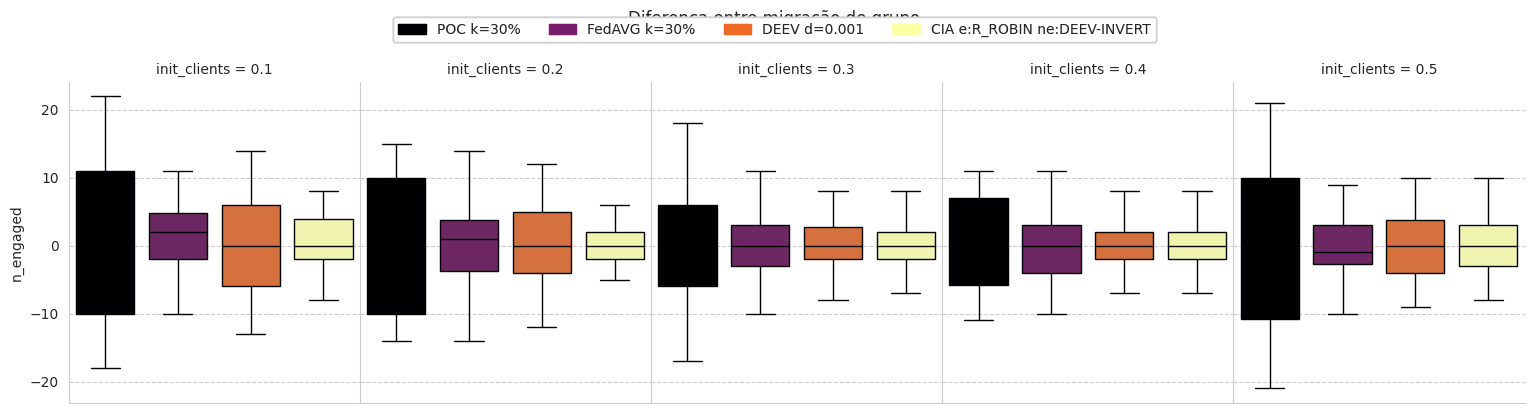

In [442]:
plot_gain_engagement(new_df, bar_legends, "Diferença entre migração de grupo", 'teste.png')
# plot_swap_engagement(new_df, bar_legends, "Clientes participantes selecionados que parmaneceram participantes", 'teste.png')

### Clientes participantes selecionados que parmaneceram participantes (Rentenção dos clientes enganjados)

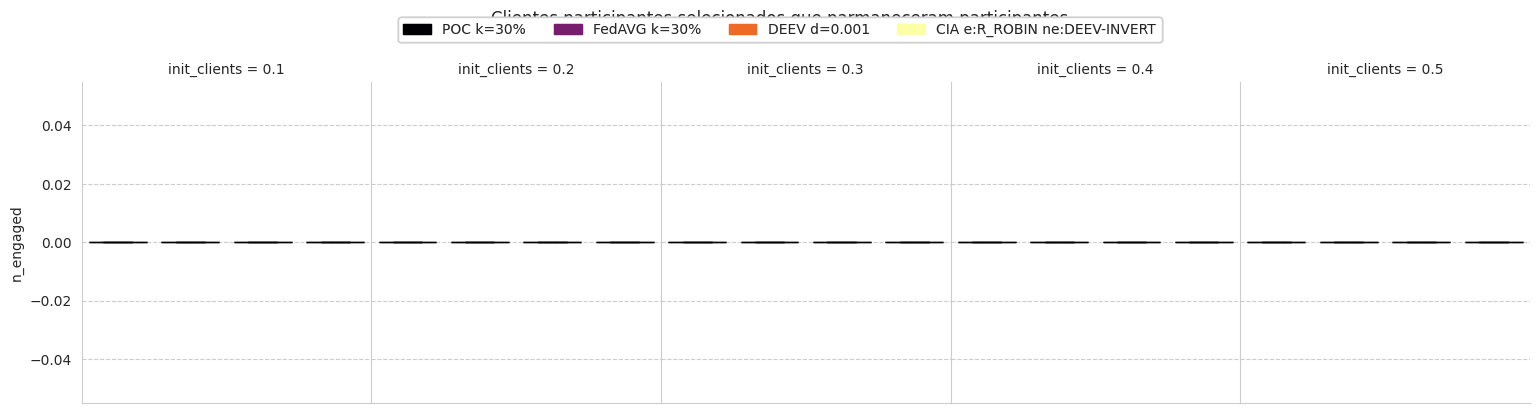

In [418]:
plot_swap_engagement(new_df, 'no_swap_engagement', bar_legends, 'Clientes participantes selecionados que parmaneceram participantes', 'teste.png')

### Clientes participantes selecionados que tornaram-se não participantes

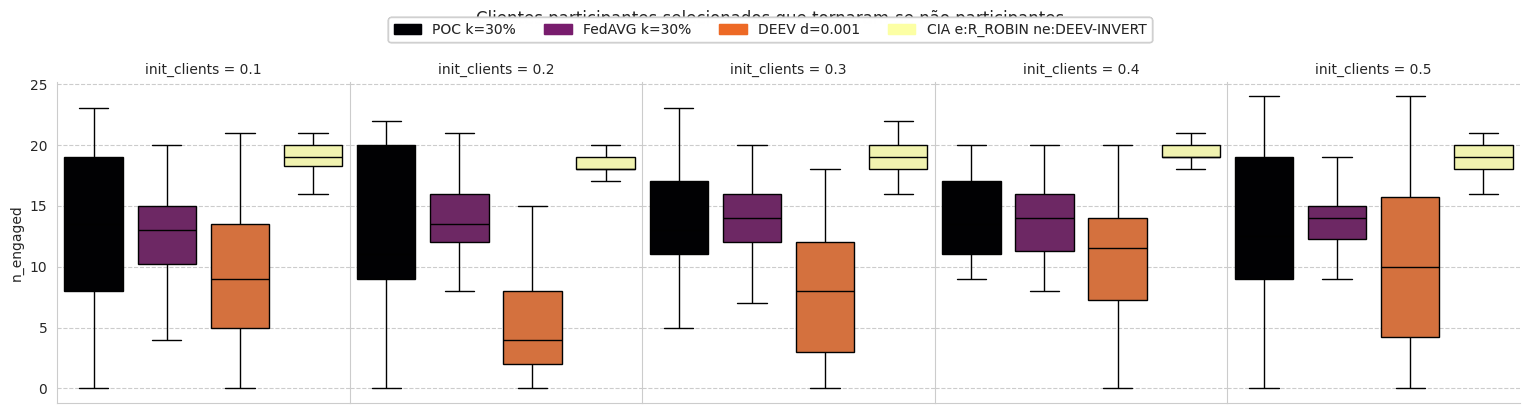

In [419]:
plot_swap_engagement(new_df, 'swap_engagement',bar_legends, "Clientes participantes selecionados que tornaram-se não participantes", 'teste.png')

### Clientes não participantes selecionados que tornaram-se participantes

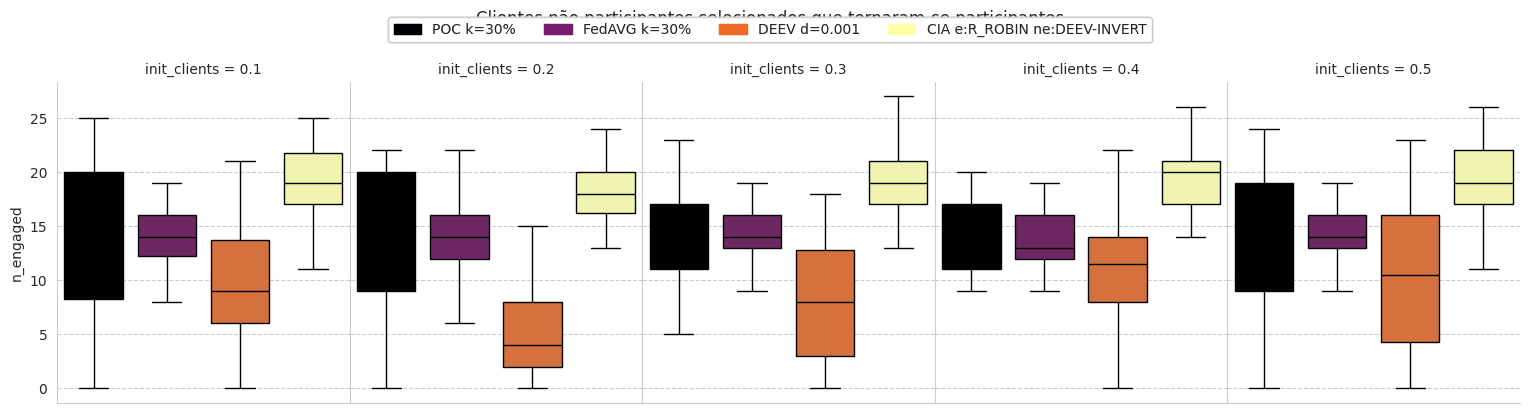

In [420]:
plot_swap_engagement(new_df, 'swap_not_engagement',bar_legends, "Clientes não participantes selecionados que tornaram-se participantes", 'teste.png')

### Clientes não participantes selecionados que parmaneceram não participantes

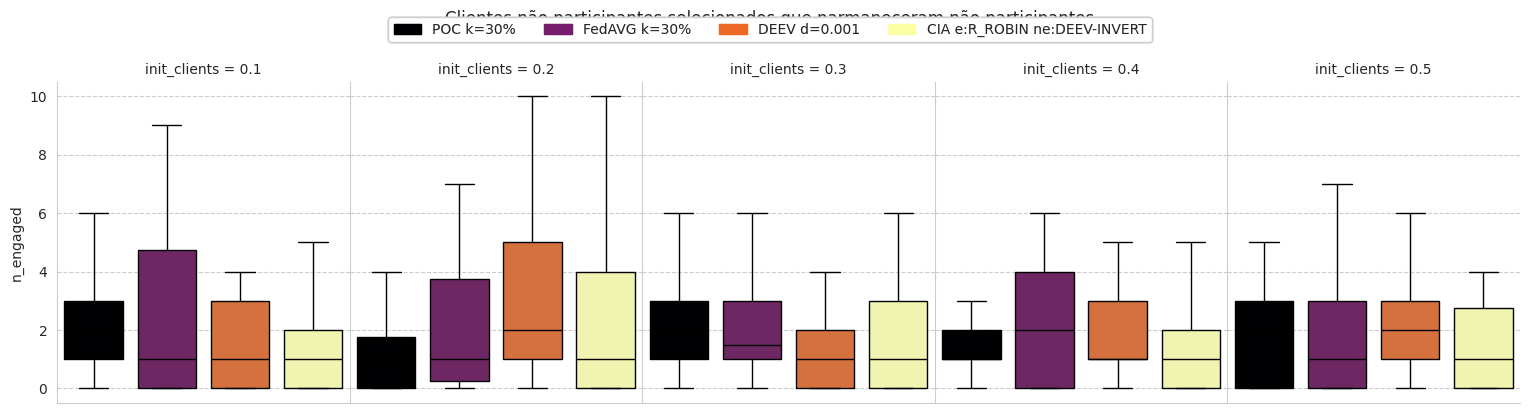

In [421]:
plot_swap_engagement(new_df, 'no_swap_not_engagement', bar_legends, "Clientes não participantes selecionados que parmaneceram não participantes", 'teste.png')


# TESTE

In [483]:
sns.relplot(
    data=s_data_50.loc[(s_data_50['tid'].isin(only) | s_data_50['tid'].isin(filter_data))],
    x='rounds',
    y='n_participating_clients',
    hue='tid',
    col='ic',
    kind='line',
    palette=barplot_palette,
)

ValueError: The palette dictionary is missing keys: {'POC 30 ic:40', 'AVG 30 ic:20', 'LetsFed DEEV-INVERT R_ROBIN ic:50 expl:50', 'LetsFed DEEV-INVERT R_ROBIN ic:40 expl:50', 'POC 30 ic:30', 'DEEV 0.001 ic:10', 'POC 30 ic:50', 'DEEV 0.001 ic:20', 'LetsFed DEEV-INVERT R_ROBIN ic:30 expl:50', 'POC 30 ic:10', 'DEEV 0.001 ic:50', 'AVG 30 ic:40', 'AVG 30 ic:10', 'LetsFed DEEV-INVERT R_ROBIN ic:20 expl:50', 'POC 30 ic:20', 'DEEV 0.001 ic:40', 'LetsFed DEEV-INVERT R_ROBIN ic:10 expl:50', 'DEEV 0.001 ic:30', 'AVG 30 ic:50', 'AVG 30 ic:30'}

In [143]:
import matplotlib.ticker as mtick

def my_lineplot_v2(t, legend_elements, suptitle, filename_to_save, config=0):
    t['n_participating_clients'] = t['n_participating_clients'] / t['n_participating_clients'].max()
    g = sns.relplot(
        data=t,
        x='rounds',
        y='n_participating_clients',
        col='ic',
        hue='tid',
        style='tid',
        markers=others_markers,
        markevery=5,
        dashes=[[1,0]],
        markersize=8,
        palette=others_palette,
        errorbar=('ci', False),
        facet_kws={'sharey': True, 'legend_out': False},
        kind='line',
    )
    g._legend.remove()

    g.set_axis_labels("Communication Rounds", r"$|C_{\iota}|$", fontsize=14)
    for i, ax in enumerate(g.axes[0]):
        ax.set_ylim(0,1)
        if config == 0:
            a = r'Start with $|C_{\iota}|$'
            ax.set_title(f"{a}={ics[i]*100:.0f}")
            ax.set_xlabel("")
            ax.set_xticklabels([])
        elif config == 1:
            ax.set_title("")
            ax.set_xlabel("")
            ax.set_xticklabels([])
        else:
            ax.set_title("")
            if i != 2:
                ax.set_xlabel("")
    if config == 0:
        g.fig.legend(handles=legend_elements, ncol=4, loc='center', bbox_to_anchor=(0.5, 1.08))
    g.fig.set_size_inches(13,3)
    plt.subplots_adjust(hspace=0, wspace=0)
    # plt.xticks([])
    # g.fig.suptitle(suptitle, y=1.2)
    g.savefig(filename_to_save, dpi=200, format='eps')
    # g.fig.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
def my_lineplot_v3(t, legend_elements, suptitle, filename_to_save, config=0):
    # Normaliza a coluna 'n_participating_clients'
    t['n_participating_clients'] = t['n_participating_clients'] / t['n_participating_clients'].max()

    # Cria a figura e os subplots
    fig, axes = plt.subplots(2, 2, figsize=(7, 6))  # Configura uma grade 2x2
    axes = axes.flatten()  # Transforma a matriz em uma lista plana

    # Itera sobre os subplots para desenhar os gráficos de linha
    for i, ax in enumerate(axes):
        # Filtra os dados baseados em 'ic' para cada subplot
        init_client = t['ic'].unique()[i % len(t['ic'].unique())]
        filtered_df = t[t['ic'] == init_client]

        # Desenha o gráfico de linha no subplot correspondente
        sns.lineplot(
            x='rounds',
            y='n_participating_clients',
            hue='tid',
            style='tid',
            data=filtered_df,
            markers=others_markers,
            markevery=5,
            dashes=[[1, 0]],
            markersize=8,
            palette=others_palette,
            ax=ax
        )

        # Configurações de cada subplot
        if config == 0:
            title = f"Start with $|C_{{\iota}}|={ics[i]*100:.0f}$"
            ax.set_title(title)
        else:
            ax.set_title("")
        ax.set_xlabel('Communication Rounds' if i // 2 == 1 else "", fontsize=16)  # Remove o texto do eixo X
        ax.set_ylabel(r"$C_{\iota}$ (%)" if i % 2 == 0 else "", fontsize=16)
        ax.set_ylim(0.2, 1)
        # ax.set_xticklabels([])  # Remove os rótulos do eixo X
        ax.legend_.remove()  # Remove a legenda para cada subplot

        ax.label_outer()  # Gerencia os rótulos de eixo para reduzir duplicação
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Formata o eixo Y como porcentagem

    # Ajustes finais na figura
    if config == 0:
        fig.legend(handles=legend_elements, ncol=4, loc='center', bbox_to_anchor=(0.5, 0.95), frameon=False, fontsize=14)
    plt.subplots_adjust(hspace=0.19, wspace=0.05)
    # fig.suptitle(suptitle)

    # Salva o gráfico
    plt.savefig(filename_to_save, dpi=200, format='eps')

/tmp/ipykernel_13543/1690070198.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['n_participating_clients'] = t['n_participating_clients'] / t['n_participating_clients'].max()
/tmp/ipykernel_13543/1690070198.py:62: UserWarning: 
The dashes list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipykernel_13543/1690070198.py:62: UserWarning: 
The dashes list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipykernel_13543/1690070198.py:62: UserWarning: 
The dashes list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipykernel_13543/1690070198

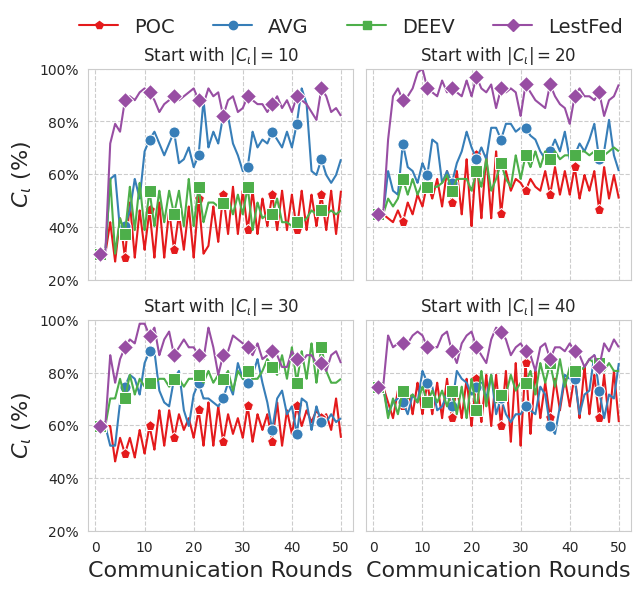

In [144]:
d = s_data_25.loc[(s_data_25['tid'].isin(only) | s_data_25['tid'].isin(filter_data))]
# d.head()
my_lineplot_v3(d.loc[~(d['ic'] == 0.1)], legend_elements, "Exploration 25%", "new_engaged_per_round_0.25.eps")

/tmp/ipykernel_1404524/3332361588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['n_participating_clients'] = t['n_participating_clients'] / t['n_participating_clients'].max()
/tmp/ipykernel_1404524/3332361588.py:5: UserWarning: 
The dashes list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(


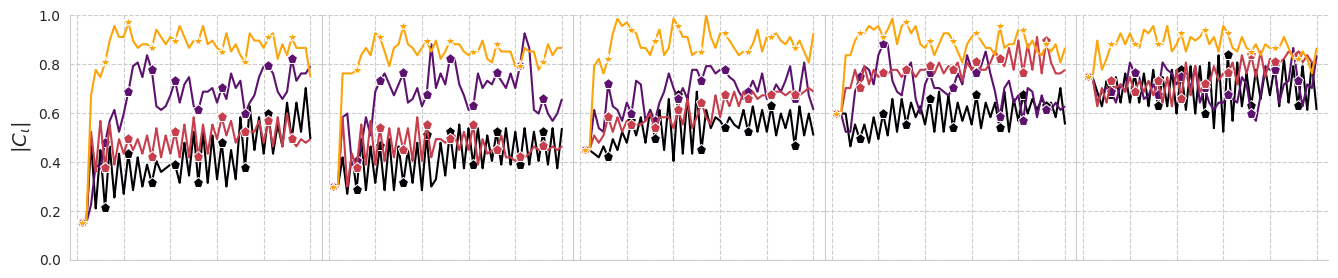

In [86]:
d = s_data_50.loc[(s_data_50['tid'].isin(only) | s_data_50['tid'].isin(filter_data))]
my_lineplot_v2(d, legend_elements, "Exploration 50%", "engaged_per_round_0.50.eps", config=1)

/tmp/ipykernel_1404524/3332361588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['n_participating_clients'] = t['n_participating_clients'] / t['n_participating_clients'].max()
/tmp/ipykernel_1404524/3332361588.py:5: UserWarning: 
The dashes list has fewer values (1) than needed (20) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(


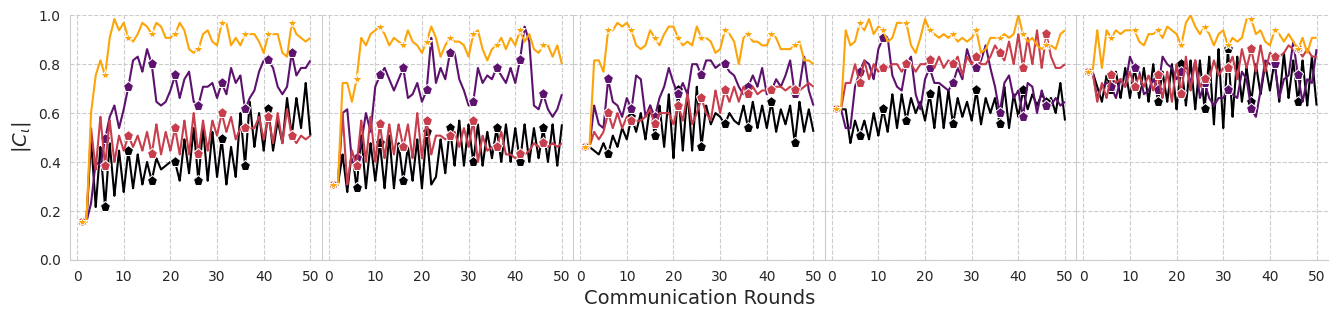

In [87]:
d = s_data_75.loc[(s_data_75['tid'].isin(only) | s_data_75['tid'].isin(filter_data))]
# d.head()
my_lineplot_v2(d, legend_elements, "Exploration 75%", "engaged_per_round_0.75.eps", config=2)
